<div style="border:solid Chocolate 2px; padding: 40px">

<b>Hello, Ben!👋 How are you today?</b>
    
My name is Arina U. and I am glad to be your reviewer in this project! Nice to meet you!<br />


You can find my comments in <font color='green'>green</font>, <font color='gold'>yellow</font> and <font color='red'>red</font> boxes. Examples you can see below:
    
<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> In case if task is completely correct and everything is alright!
</div>


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  In case when I can give some advice that can help you to improve your work or recommend you some useful links and resources that can help you widen your knowledge and help in future tasks.
</div>

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> In case when step requires some extra work and some corrections. Project can't be accepted with comments in the red boxes
</div>

Please pay attention to not move or change my comments. It would be good to highlight your answers in some way. 

#### <font color='Purple'>Student's commentary:</font> for example like this <a class="tocSkip"> </div>
    
OK, now let's go!😏
</font>

# Videogame Marketing Plan

In this project, my goal is to figure out what factors are most important to the success of a video game and advise the marketing team as to which products they should focus on. 

## Data Preprocessing

### Importing Packages

In [1]:
#import packages
import pandas as pd
!pip install -U pip
#!pip install -U 'matplotlib == 3.4.3'
!pip install -U matplotlib
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
import seaborn as sns
!pip install missingpy
from missingpy import MissForest
import seaborn as sns
from statsmodels.formula.api import ols
print('matplotlib: {}'. format(matplotlib. __version__)) 

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
matplotlib: 3.4.3


#### Conclusions

I imported:
- **Pandas**: For data preprocessing and basic descriptive statistics
- **Matplotlib.pyplot**: For creating graphs
- **Numpy**: For adding support for large, multi-dimensional arrays and matrices
- **Scipy.Stats**: For calculating z-scores and running t-tests
- **Missingpy**: For imputing missing data using a Random Forest algorithm
- **Seaborn**: For creating graphs
- **Statsmodels.formula.api**: For running a linear regression

### Importing Data

In [2]:
#import that data
videogame_df = pd.read_csv("/datasets/games.csv")
#look at the data information
videogame_df.info()
print('\n')
#look at the first 5 rows
display(videogame_df.head())
print('\n')
#remove observations that dont have a Name
videogame_df = videogame_df[videogame_df['Name'].notnull()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB




,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
To import the data it is better to use the `try-except` construction, it allows to avoid errors that can be caused by incorrect paths to files. More information see below:
       
https://www.w3schools.com/python/python_try_except.asp

<font color='Purple'> Student's commentary:</font> What value does this provide? If I have an incorrect path to the files then I will get an error and know that I have to change something. <a class="tocSkip">

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Yes, you are right, but there are some 'extensions' for this construction: you can fix your custom error text and identify the problem more accurately. In fact, Python provides a litt;e bit extended description of the error, this construction and other exceptions allows to reduce the text and use it in different parts of your code, so , it is useful to be familiar with this feature.

#### Conclusions

In the dataset we have **11 variables** and **16715 observations**. We are missing values in the `Name`(2), `Year_of_Release`(269), `Genre`(2), `Critic_Score`(8578), `User_Score`(6701), and `Rating`(6766) variables. Since we only have 2 missing values for `Name` and `Genre`, and they are the same observations, I removed them from the dataset. Lastly, I will need to change the data type of `Year_of_Release` from float to int, and `User_score` from object to int. 

### Check for Duplicates and Looking at Unique Values

In [3]:
#Checking for Duplicates
#put everything in lowercase
videogame_df['Name'] = videogame_df['Name'].str.lower()
videogame_df['Platform'] = videogame_df['Platform'].str.lower()
videogame_df['Genre'] = videogame_df['Genre'].str.lower()
videogame_df['Rating'] = videogame_df['Rating'].str.lower()
#seeing how many duplicate rows there are 
print('\n')
print('There are', videogame_df.duplicated().sum(), 'duplicated rows')
print('\n')
#look at value counts for each variable
for x in videogame_df:
    print(videogame_df[x].value_counts())
#replacing tbd values
videogame_df['User_Score'].replace('tbd', np.NaN,inplace=True)
videogame_df['User_Score'] = videogame_df['User_Score'].astype('float64')
#removing very low frequency category values
videogame_df = videogame_df[(videogame_df['Rating'] != 'ao') & (videogame_df['Rating'] != 'k-a') & (videogame_df['Rating'] != 'rp') & (videogame_df['Rating'] != 'ec')]
videogame_df = videogame_df[(videogame_df['Platform'] != 'pcfx') & (videogame_df['Platform'] != 'gg') & (videogame_df['Platform'] != 'tg16') & (videogame_df['Platform'] != '3do') & (videogame_df['Platform'] != 'ws') & (videogame_df['Platform'] != 'scd') & (videogame_df['Platform'] != 'ng') & (videogame_df['Platform'] != 'gen')]
videogame_df = videogame_df[~((videogame_df['Platform'] == 'DS') & (videogame_df['Year_of_Release'] == 1985))]
#resetting the index
videogame_df.reset_index(inplace=True)



There are 0 duplicated rows


need for speed: most wanted                   12
madden nfl 07                                  9
fifa 14                                        9
lego marvel super heroes                       9
ratatouille                                    9
                                              ..
thoroughbred breeder ii                        1
naruto shippuden: legends: akatsuki rising     1
yoshi's island ds                              1
dino crisis 3                                  1
clock zero: shuuen no ichibyou portable        1
Name: Name, Length: 11559, dtype: int64
ps2     2161
ds      2151
ps3     1331
wii     1320
x360    1262
psp     1209
ps      1197
pc       974
xb       824
gba      822
gc       556
3ds      520
psv      430
ps4      392
n64      319
xone     247
snes     239
sat      173
wiiu     147
2600     133
nes       98
gb        98
dc        52
gen       27
ng        12
ws         6
scd        6
3do        3
tg16       2
pcfx       1

#### Conclusions

After converting all the strings to lowercase, I found zero duplicate rows. I also checked the unique values of each variable and found that `User_Score` had a large proportion of 'tbd' values, so I converted those to missing values. Lastly, I removed games that received very low frequency ratings or were on very low frequency platforms. I did this because they will not provide help in learning about the most important factors for video games with normal ratings and on normal platforms. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Ben, it is absolutely correct actiona to check the data for dublicates. Also, you correctle changed the data types and preprocessed the tbd value

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
I suppose that it is rather risky to delete the data without any good reason and arguments ('low frequency' in data is not a very good reason). Removing data you simply impoverish your data while this data can bring valuable information (I suppose that in case of Platform and Rating these rows are important) so be more careful with so 'strong' actions.

<font color='Purple'>Student's commentary:</font> I deleted it because I thought it would be uninformative if we are trying to understand the market overall. I thought it might affect the results or add erroneous information to a graph if I am putting weight on platforms and ratings that are very rare. Do you think it is better to keep it in and have bars of graphs with only a few observations?  <a class="tocSkip">

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, the common logic: you can consider these values as anomalies, it can be that, but deletion of the data - is the last thing you can did, because data is valuable:) You can create new dataframe or other Python object (like list or dictionary) and save these values in it and analyse them separately to confirm your hypothesis (is it anomaly? can it provide 'noise' in ml model prediction?)
        
And yes, there is nothing bad in analysing even two values:)

### Dealing With Missing Values

#### Looking at the Frequency of Missing Values

In [4]:
videogame_df.isna().sum()*100/len(videogame_df)

index               0.000000
Name                0.000000
Platform            0.000000
Year_of_Release     1.604567
Genre               0.000000
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.129808
User_Score         54.429087
Rating             40.300481
dtype: float64

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
    
Ok, you can check the percentage of missing values in all columns in a more simple manner, for example, like this:
    
`data.isna().sum()*100/len(data)`
       
`data.isna().mean() * 100`

Or like this:
    
`report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)`

<font color='Purple'>Student's commentary:</font> This is super helpful! Thanks! <a class="tocSkip">

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍</b> 

##### Conclusions

For the data, `Critic_Score`, `User_Score` and `Rating` have **greater than 40 percent** missing values, which will need to be addressed with imputation. Contrastingly, **less than 2 percent** of data in the `Year_of_Release` variable is missing, so we could address this with imputation or drop those observations if they seem to be missing at random.  

#### Checking if Data is Missing at Random

In [5]:
#list of variables with missing values
missing_list = ['Year_of_Release', 'Critic_Score', 'User_Score','Rating']
categorical_variables = ['Platform','Genre','Rating']
#for all the variables with missing values
for y in missing_list:
    #for all the variables that are non-ordinal categories
    for x in categorical_variables:
        #to avoid checking variables against eachother
        if x != y:
            #separate each unique value for the categorical variables
            types = videogame_df[x].unique()
            #for all the unique values for the categorical variables
            for i in types:
                #focusing on unique values of non-ordinal categorical variables that occur over 500 times for robustness
                if videogame_df[videogame_df[x] == i][x].count() > 500:
                        #this calculates the percentage missing for that unique value of the non-ordinal categorical variable
                        percent_missing = (videogame_df[videogame_df[x] == i][y].isna().sum())/len(videogame_df[videogame_df[x] == i])
                        #this calculates the overall perentage missing for that non-ordinal categorical variable
                        percent_missing_overall = videogame_df[y].isna().sum()/len(videogame_df)
                        #check if any of the unique values are missing 50% more or less data than the overall missing percentage
                        if abs(percent_missing - percent_missing_overall)/(percent_missing_overall) > .5:
                            print('The {} value of the {} variable is missing {:.2%} of its values when {} is missing compared to it missing {:.2%} overall'.format(i,x,percent_missing, y, percent_missing_overall))


The wii value of the Platform variable is missing 2.58% of its values when Year_of_Release is missing compared to it missing 1.60% overall
The ps value of the Platform variable is missing 0.59% of its values when Year_of_Release is missing compared to it missing 1.60% overall
The xb value of the Platform variable is missing 2.55% of its values when Year_of_Release is missing compared to it missing 1.60% overall
The gc value of the Platform variable is missing 2.52% of its values when Year_of_Release is missing compared to it missing 1.60% overall
The adventure value of the Genre variable is missing 0.77% of its values when Year_of_Release is missing compared to it missing 1.60% overall
The ps value of the Platform variable is missing 83.36% of its values when Critic_Score is missing compared to it missing 51.13% overall
The xb value of the Platform variable is missing 12.03% of its values when Critic_Score is missing compared to it missing 51.13% overall
The gc value of the Platform va

##### Conclusions

To start off, I am not very concerned about the increased missing rate among different platforms and genres when `Year_of_Release` is missing because the percentages are incredibly small overall. Yet, for `Critic_Score`, `User_Score`, and `Rating`, we have differences that are much more concerning. It looks as though Playstation(PS) games are much more likely to be missing all three of these variables. Contrastingly, Xbox(XB), Xbox 360(X360) and Gamecube(GC) games are much less likely to be missing all three of these variables. Lastly, we see much lower missing rates for games rated Mature(M), Teen(T), or Everyone 10 plus (E10+). I believe this is due to a possible correlation between missing values among all three variables. Overall, this is leading me to believe our data is **NOT missing completely at random**. 

In [6]:
numerical_variables = ['Year_of_Release','NA_sales','EU_sales','JP_sales','Other_sales','Critic_Score','User_Score']
#for all the variables with missing values
for y in missing_list:
    #for all the ordinal categorical and numeric variables
    for x in numerical_variables:
        #to avoid checking variables against eachother
        if y != x:
            #runs a t-test to compare the means of ordinal categorical and numeric variables when the variables with missing values are missing and not missing
            results = stats.ttest_ind(videogame_df[videogame_df[y].isna()][x], videogame_df[videogame_df[y].notnull()][x])
            #pulls the 2-sided p-value from the t-test and looks at when it is less than .05
            if results.pvalue < .05:
                print('When {} is missing, the mean of {} is significantly different than when {} is not missing'.format(y, x ,y))


When Year_of_Release is missing, the mean of JP_sales is significantly different than when Year_of_Release is not missing
When Critic_Score is missing, the mean of NA_sales is significantly different than when Critic_Score is not missing
When Critic_Score is missing, the mean of EU_sales is significantly different than when Critic_Score is not missing
When Critic_Score is missing, the mean of JP_sales is significantly different than when Critic_Score is not missing
When Critic_Score is missing, the mean of Other_sales is significantly different than when Critic_Score is not missing
When User_Score is missing, the mean of NA_sales is significantly different than when User_Score is not missing
When User_Score is missing, the mean of EU_sales is significantly different than when User_Score is not missing
When User_Score is missing, the mean of JP_sales is significantly different than when User_Score is not missing
When User_Score is missing, the mean of Other_sales is significantly differ

##### Conclusions

These results tell us we have significantly different means between the missing an non missing data with regards to almost every numeric variable. This is very concerning and clearly shows us that our data is **Not missing completely at random**. My best guess is that older games are more likely to be missing `Critic_Score`, `User_Score`, and `Rating`. If this were the case, this would explain why sales could be different as video game sales are increasing over time. 

#### Checking Missing Rates of Critic and User Scores by Year

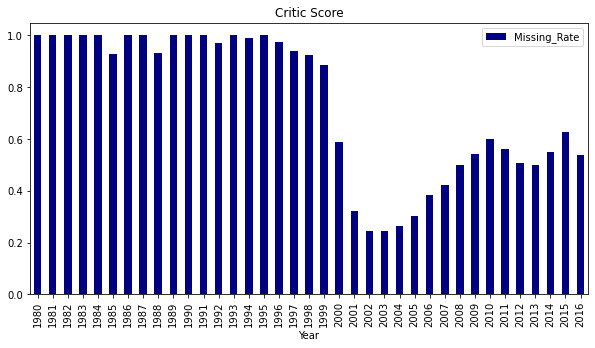

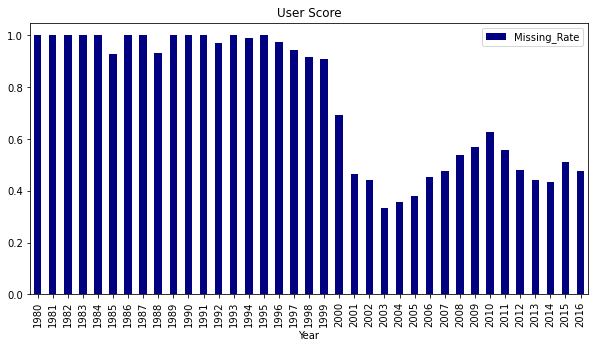

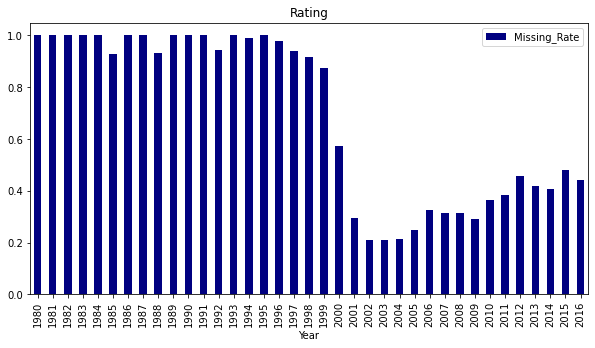

In [7]:
missing_by_years = []
columns = ['Variable','Year','Missing_Rate']
#creating a list of years
years = videogame_df[videogame_df['Year_of_Release'].notnull()]['Year_of_Release'].unique()
#for each variable with missing values
for y in ['Critic_Score', 'User_Score','Rating']:
    #for each year
    for i in years:
        #calculating the percent of values missing for that year for that variable
        percent_missing = (videogame_df[videogame_df['Year_of_Release'] == i][y].isna().sum())/len(videogame_df[videogame_df['Year_of_Release'] == i])
        #creating a series with the missing value, year, and percent missing
        values = [y,int(i),percent_missing]
        #adding column values to the series above
        zipped = zip(columns,values)
        #turning it into a dictionary
        a_dictionary = dict(zipped)
        #appending it to the missing years array
        missing_by_years.append(a_dictionary)
#converting the missing years array to a dataframe
missing_years_df = pd.DataFrame(missing_by_years)
#Sorting values by missing variable and then year 
missing_years_df.sort_values(by=['Variable','Year'],inplace=True)
#graphing bar charts with year on the x axis and missing proportion on the y axis
missing_years_df[missing_years_df['Variable'] == 'Critic_Score'][['Year', 'Missing_Rate']].plot(x='Year',kind='bar', width = 0.5, color="navy",figsize=(10,5),title='Critic Score');
missing_years_df[missing_years_df['Variable'] == 'User_Score'][['Year', 'Missing_Rate']].plot(x='Year',kind='bar', width = 0.5, color="navy",figsize=(10,5),title='User Score');
missing_years_df[missing_years_df['Variable'] == 'Rating'][['Year', 'Missing_Rate']].plot(x='Year',kind='bar', width = 0.5, color="navy",figsize=(10,5),title='Rating');

##### Conclusions

As we look at the missing rates by year, it is clear that before 2000 we have incredibly high missing rates and that this data is **NOT missing completely at random**. To solve this I will use a random forest to predict the missing values among user and critic scores. 

#### Using a Random Forest to Impute Missing Values

In [8]:
#converting rating to an ordinal categorical variable for the random forest
videogame_df['Rating'].replace({'e': 1, 'e10+': 2, 't': 3, 'm':4},inplace=True)
#removing names from the dataframe for the random forest
data = videogame_df[['Platform','Year_of_Release','Genre','NA_sales','EU_sales','JP_sales','Other_sales','Critic_Score','User_Score','Rating']]
#turning non ordinal categorical variables into dummies for the random forest
data = pd.get_dummies(data)
#identifying the categorical variables 
cat_vars = list(range(7,43))
#using MissForest for my imputation method
imp = MissForest()
imp.fit(data,cat_vars)
videogame_imputed = imp.transform(data)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7


##### Conclusions

In this section I used a random forest to impute missing values. I did this because there were not any clear simple ways to impute values that would be unbiased. MissForest "initially imputes all missing data using the mean/mode, then for each variable with missing values, MissForest fits a random forest on the observed part and then predicts the missing part. This process of training and predicting repeats in an iterative process until a stopping criterion is met, or a maximum number of user-specified iterations is reached" <cite>[Kaggle][1]</cite>. To learn about the stopping criterion, you can visit the project description <cite>[here][2]</cite>. 


[1]: https://www.kaggle.com/lmorgan95/missforest-the-best-imputation-algorithm
[2]: https://pypi.org/project/missingpy/#description

#### Merging the imputed data and the starting data

In [9]:
#creating a list of column headers
columns = data.columns.values.tolist()
#converting the imputed array to a dataframe
videogame_imputed_df = pd.DataFrame(videogame_imputed,columns=columns)
#removing all variables without imputed values
videogame_imputed_df = videogame_imputed_df[['Year_of_Release','Critic_Score','User_Score','Rating']]
#rounding the rating values to whole numbers
videogame_imputed_df['Rating'] = videogame_imputed_df['Rating'].round()
#converting the rating orindal categories back to their string values
videogame_imputed_df['Rating'].replace({1 : 'e', 2 : 'e10+', 3: 't', 4:'m'},inplace=True)
#rounding the year values and converting them to integers
videogame_imputed_df['Year_of_Release'] = videogame_imputed_df['Year_of_Release'].round().astype('int64')
#creating a dataframe of all the non imputed values
videogame_df_short = videogame_df[['Name','Platform','Genre','NA_sales','EU_sales','JP_sales','Other_sales']]
#merging the imputed and non imputed values
videogame_final_df = videogame_df_short.merge(videogame_imputed_df,left_index=True,right_index=True)
#creating a total sales variable which adds up the sales from all reigons
videogame_final_df['Total_sales'] = videogame_final_df['NA_sales'] + videogame_final_df['EU_sales'] + videogame_final_df['JP_sales'] + videogame_final_df['Other_sales']

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, Ben, it is really great that you elaborated so interesting and really difficult decision for filling in missing data. A big plus for using Random Forest here and of course for your concrete explanation of your actions and logic.

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary<a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 
       
But as you mentioned correctly, the columns critic score and user score have a rather big percentage of missing values.In fact, we do not know why the data in these columns is missing (we can only hypothesize as you did), and we do not have access to a source that would allow us to replenish the data, restore it, so it is better leave missing values in the data and simply replace them with indicators. Missing values are also some kind of signal worth paying attention to and analyzing, it is valuable in its own way! The analyst's goal when working with missing values is not about filling the 100% of missing values! When filling missing values, it is important to proceed from the specifics of the data, take into account the risks of data distortion and the introduction of artificial trends and characteristics, the same logic is about the filling in the missing values in the column `year_of_release`. 
       
For `rating` it is better to replace NaN values in the column `rating` with `unknown`as marker because, again, if we try to fill in missing values in this column in other ways we face the risk of distortion of the original data. What is more important is that at the next steps of the analysis we need to analyse the rating by the region, and at this step it is better to analyse the games without rating.

<font color='Purple'>Student's commentary:</font> From my understanding, if data is not missing completely at random, then leaving the values blank is biasing the data. For example, if the ratings were more likely to be missing from before 2000s then if I just leave it blank I am biasing my analysis. <a class="tocSkip">

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
It depends on the concrete situation and specificity of the concrete data. So, it is simply important to understand hor risky it can be to filling in missing values using custom strategies, external data or measures like median for example. Missing values is an important indicator and it is better not to ignore it but analyse:)

## Analysis

### Video Games Released Per Year

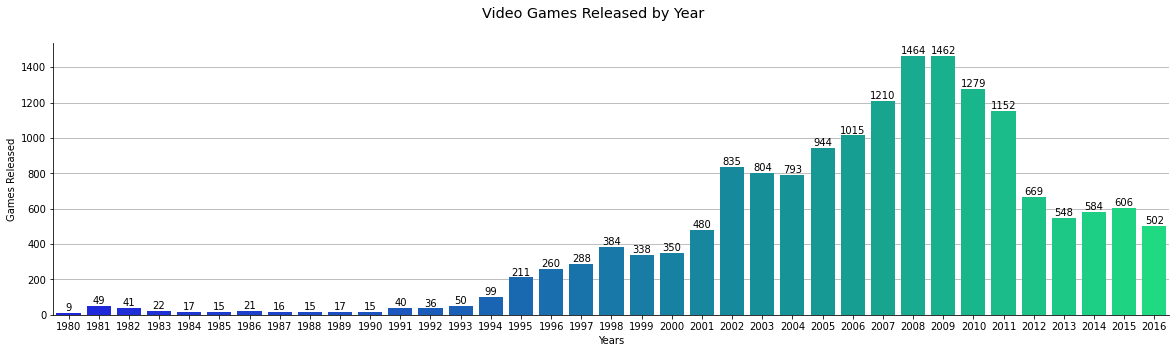

In [10]:
plt.figure(figsize = (20,5))
#create a plot that counts the values of each year in the dataset
ax = sns.countplot(x="Year_of_Release", data=videogame_final_df, palette="winter");
#create gridlines along the y axis below the bars
ax.set_axisbelow(True);
ax.yaxis.grid(zorder=0);
plt.suptitle('Video Games Released by Year',size='x-large');
plt.ylabel('Games Released');
plt.xlabel('Years');
#have values on top of the bars
ax.bar_label(ax.containers[0]);
#remove the spines on the top and the right
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);

#### Conclusions

From the graph above it is clear that video games grew in popularity dramatically starting in the early 2000's. Surprisingly, they seemed to peak around 2009 and have been dropping since. 

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
Plot looks great but it provides error (and almost all the plots in your project provide the same error, see the screenshot):
        
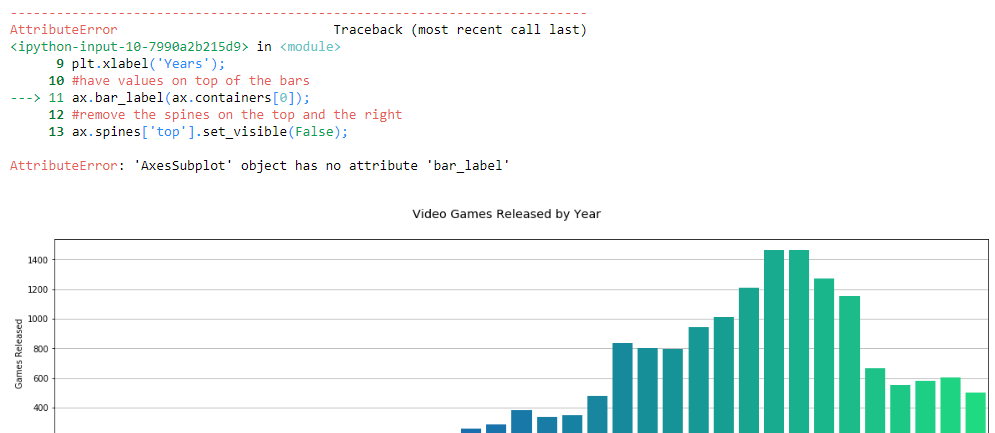
        
I suppose it can be connected with the version of libraries that you used for visualization. So try to understand how this bug can be fixed. Some materials about this case:
        
https://discourse.matplotlib.org/t/axessubplot-object-has-no-attribute-bar-label/21985
        
https://stackoverflow.com/questions/67741864/axessubplot-object-has-no-attribute-bar-label?noredirect=1&lq=1
        
ou can try to upgrade the matplotlib to the concret version if you used new methods.

<font color='Purple'>Student's commentary:</font> I am trying to understand exactly how to get this to work. I want to update the matplotlib version to 3.4.3, but the only way I can get it to work is to run:

!pip install -U pip

!pip install -U matplotlib   

and then restart the kernal. 

    
If you know how to keep matplotlib updated to version 3.4.3 that would be amazing!

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>
       
So you can use `==` and the name of your library (matplotlib in your case) and don't forget about `!` befor pip, the variant on the screen is for console
       
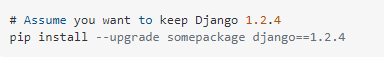


<font color='Purple'>Student's commentary Version 2:</font> I am still running into the same issue. Im getting the message that it is "Defaulting to user installation because normal site-packages is not writeable". I looked it up but all the solutions do not seem to be console solutions that I dont know how to convert for this setting. Any help would be amazing! 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: third iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>
        
I don't know, but it is always be enough to upgrade the library to concrete version, that's all:) Ok when you tried to upgrade some libraries there can be some warnings, but if the code works you can ignore these warnings. Your code worked in previous iteration of the review. In my version I cannot see such warning, look at the screen below:
        


### Sales By Platform

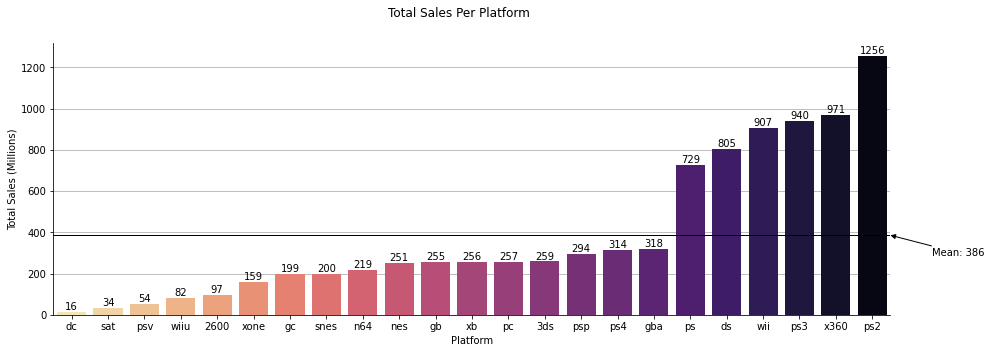

In [11]:
#create a table that sums up total sales by platform
sales_by_platform = pd.pivot_table(videogame_final_df,index='Platform',values='Total_sales', aggfunc='sum')
sales_by_platform = sales_by_platform.reindex(sales_by_platform.sort_values(by='Total_sales', ascending=True).index)
sales_by_platform.reset_index(level=0, inplace=True)
plt.figure(figsize=(15,5))
#create a bar graph to show the total sales by platform
ax = sns.barplot(x='Platform', y='Total_sales', data=sales_by_platform, palette="magma_r");
#add gridlines on the y axis below the graph
ax.set_axisbelow(True);
ax.yaxis.grid(zorder=0);
plt.suptitle('Total Sales Per Platform');
plt.ylabel('Total Sales (Millions)');
plt.xlabel('Platform');
#add values on top of the bars
ax.bar_label(ax.containers[0],fmt='%.0f');
#create a black line at the mean
ax.axhline(sales_by_platform['Total_sales'].mean(), color='black', linewidth=1);
#add an arrow pointing to the mean line and displaying the mean
ax.annotate('Mean: {:0.0f}'.format(sales_by_platform['Total_sales'].mean()),xy=(1,sales_by_platform['Total_sales'].mean()), xycoords=('axes fraction','data'),xytext=(1.05,sales_by_platform['Total_sales'].mean()-100),arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='arc'));
#removing the spines of the top and the right
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);

#### Conclusions

The system with the most sales so far is the Playstation 2 with over a billion dollars in sales. The average sales per platform was around 386 million dollars. Yet, one thing to keep in mind is that the Playstation 2 was released in 2000, so it is hard to compare that number to newer consoles such as the Xbox One and Playstation 4. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, as a whole - correct!

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
But the same error for plot as above.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍</b>

### Top 6 Platforms By Sales Yearly Distribution

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


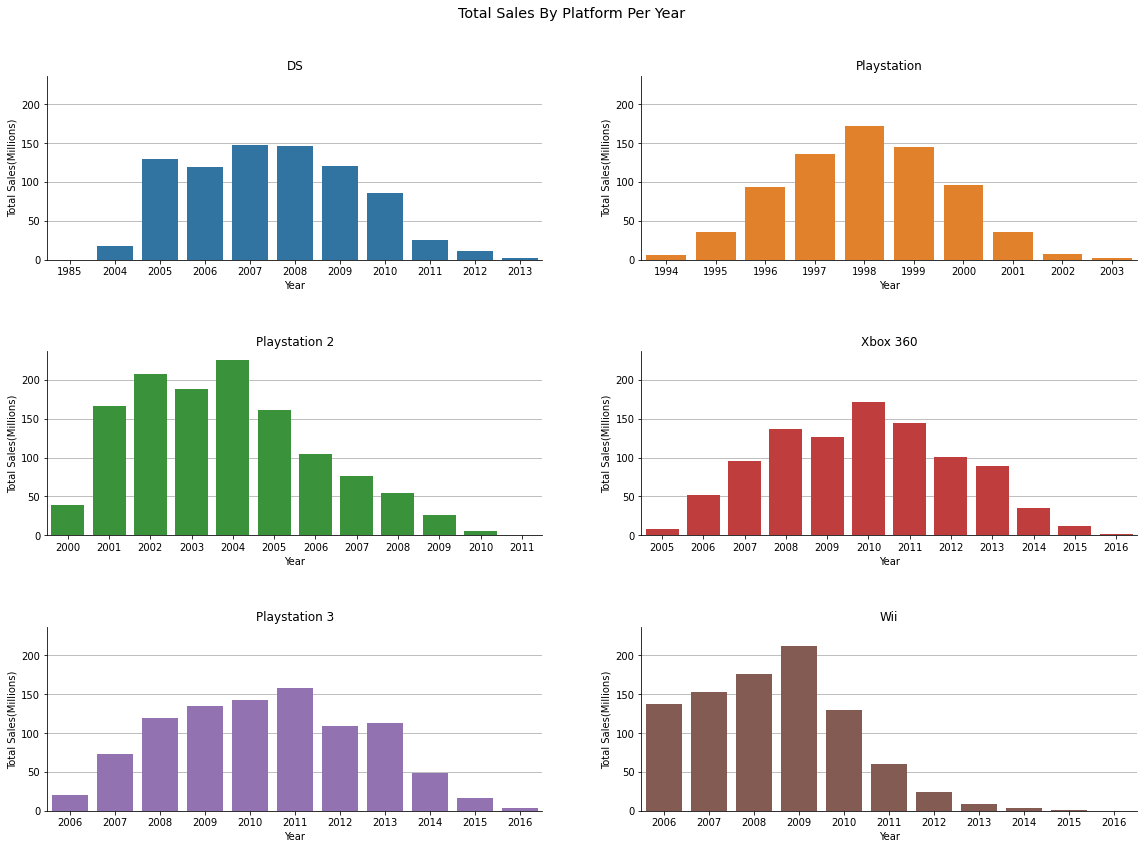

In [12]:
#calculates the total sales by platform by year
sales_by_platform_by_year = pd.pivot_table(videogame_final_df,index=['Year_of_Release','Platform'], values='Total_sales', aggfunc='sum')
#making platform a column
sales_by_platform_by_year.reset_index(level=1, inplace=True)
#keeping only the platforms with the most sales from above
sales_by_platform_by_year = sales_by_platform_by_year[sales_by_platform_by_year['Platform'].isin(['ps2','x360','ps3','wii','ds','ps'])]
#making year a column
sales_by_platform_by_year.reset_index(level=0, inplace=True)
#creating suplots with bar graphs for each of the 6 platforms
g = sns.FacetGrid(sales_by_platform_by_year, col="Platform",col_wrap=2, height=4,aspect=2,hue='Platform',sharex=False);
g.map(sns.barplot, "Year_of_Release", 'Total_sales');
#setting labels, titles, and gridlines
g.axes[0].set_title('DS');
g.axes[0].set_ylabel('Total Sales(Millions)');
g.axes[0].set_xlabel('Year');
g.axes[0].set_axisbelow(True);
g.axes[0].yaxis.grid(zorder=0);
g.axes[1].set_title('Playstation');
g.axes[1].set_ylabel('Total Sales(Millions)');
g.axes[1].set_xlabel('Year');
g.axes[1].set_axisbelow(True);
g.axes[1].yaxis.grid(zorder=0);
g.axes[2].set_title('Playstation 2');
g.axes[2].set_ylabel('Total Sales(Millions)');
g.axes[2].set_xlabel('Year');
g.axes[2].set_axisbelow(True);
g.axes[2].yaxis.grid(zorder=0);
g.axes[3].set_title('Xbox 360');
g.axes[3].set_ylabel('Total Sales(Millions)');
g.axes[3].set_xlabel('Year');
g.axes[3].set_axisbelow(True);
g.axes[3].yaxis.grid(zorder=0);
g.axes[4].set_title('Playstation 3');
g.axes[4].set_ylabel('Total Sales(Millions)');
g.axes[4].set_xlabel('Year');
g.axes[4].set_axisbelow(True);
g.axes[4].yaxis.grid(zorder=0);
g.axes[5].set_title('Wii');
g.axes[5].set_ylabel('Total Sales(Millions)');
g.axes[5].set_xlabel('Year');
g.axes[5].set_axisbelow(True);
g.axes[5].yaxis.grid(zorder=0);
g.fig.subplots_adjust(top=0.9);
g.fig.suptitle('Total Sales By Platform Per Year',size='x-large');
#adding tick values to all graphs on the left and the bottom
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)
for axis in g.axes.flat:
    axis.tick_params(labelbottom=True)
#adding space between bar graphs
plt.subplots_adjust(hspace = 0.5);
plt.subplots_adjust(wspace = 0.2);

#### Conclusions

For the top 6 selling platforms, they seem to have a 10-year window of sales, which peak around the 5th year. They also all seem to follow a normal distributional pattern besides the Wii, which is right-skewed. This tells us that the Wii was super popular when it was released, but declined quicker than the other top 6 platforms. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Agree with the logic of your analysis, the visualization looks really informative!

### Console Shelf Life

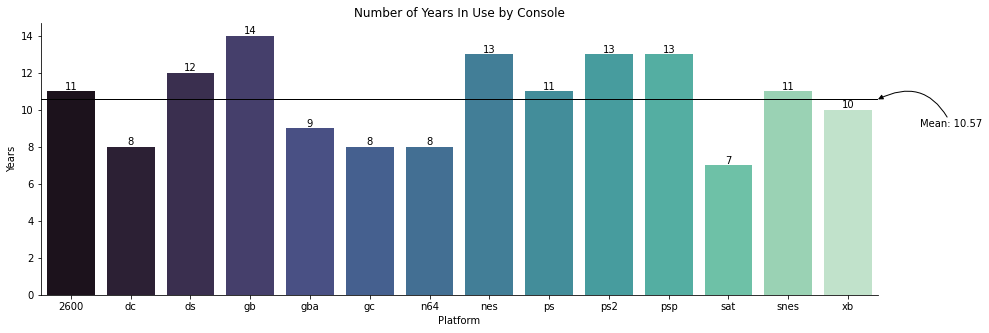

In [13]:
#create a pivot table that calculates the sales of each platform by year
platforms = pd.pivot_table(videogame_final_df,index='Platform',columns='Year_of_Release', values='Total_sales', aggfunc='sum')
#fill in missing values as 0 sales
platforms.fillna(0,inplace=True)
#isolate platforms thats shelf life has ended (i.e. they are no longer in use)
platforms_old = platforms[platforms[2016] == 0]
#make platforms a column
platforms_old.reset_index(level=0, inplace=True)
plt.figure(figsize=(15,5))
#create a bar graph with the platforms that no longer in use and the number of years they were in use
ax = sns.barplot(platforms_old['Platform'],platforms_old.astype(bool).sum(axis=1),palette='mako')
#create a line for the mean
ax.axhline(platforms_old.astype(bool).sum(axis=1).mean(), color='black', linewidth=1)
#add an arrow and the value of the mean on the side
ax.annotate('Mean: {:0.2f}'.format(platforms_old.astype(bool).sum(axis=1).mean()),xy=(1,platforms_old.astype(bool).sum(axis=1).mean()), xycoords=('axes fraction','data'),xytext=(1.05,platforms_old.astype(bool).sum(axis=1).mean()-1.5),arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='arc3,rad=.5'))
ax.set_title('Number of Years In Use by Console')
plt.ylabel('Years');
plt.xlabel('Platform');
#add values to the top of the bars
ax.bar_label(ax.containers[0],fmt='%.0f');
#remove spines on top and right
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);

#### Conclusions

The graph above shows how long, each of the platforms that are no longer in use, sold videogames. The average shelf life was around 10 and a half years. 

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
The same error for plot as above.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>
        
Code works without error, good job!

### Consoles In Use Per Year

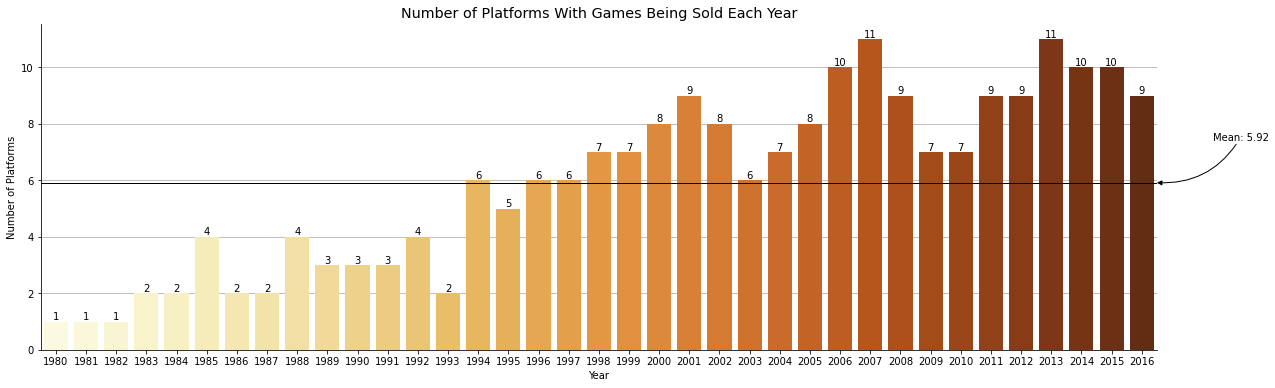

In [14]:
#adding up the number of consoles per year
platforms.astype(bool).sum(axis=0)
plt.figure(figsize=(20, 6))
#creating a barplot with a bar for each year and the number of consoles with sales as the y axis
ax=sns.barplot(platforms.columns,platforms.astype(bool).sum(axis=0),palette='YlOrBr');
#creating a mean line
ax.axhline(platforms.astype(bool).sum(axis=0).mean(), color='black', linewidth=1);
#creating an arrow and the mean value on the side
ax.annotate('Mean: {:0.2f}'.format(platforms.astype(bool).sum(axis=0).mean()),xy=(1,platforms.astype(bool).sum(axis=0).mean()), xycoords=('axes fraction','data'),xytext=(1.05,platforms.astype(bool).sum(axis=0).mean()+1.5),arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='arc3,rad=-.3'));
ax.set_title('Number of Platforms With Games Being Sold Each Year',size='x-large');
plt.ylabel('Number of Platforms');
plt.xlabel('Year');
#adding values to the top
ax.bar_label(ax.containers[0],fmt='%.0f');
#removing the top and right spines and adding y axis gridlines
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.set_axisbelow(True);
ax.yaxis.grid(zorder=0);

#### Conclusions

Looking at the number of platforms in use per year, we see a pattern of growth and decline. In this I am saying that new platforms are added for a few years, then a few old platforms get discontinued the next couple years, and then the cycle repeats. Based on this chart, I would have expected some new platforms in 2017. In reality, the Nintendo Switch was released in 2017, while Xbox and Playstation waited until 2020 to release their new platforms.  

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
The same error for plot as above.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>
        
Everything is alright!

### Cutting Data Before 2006

In [15]:
#removing data before 2014
videogame_2014_plus = videogame_final_df[videogame_final_df['Year_of_Release']>=2014]
videogame_2014_plus.reset_index(inplace=True,drop=True)
videogame_2014_plus.info()

#look at value counts for each variable
for x in videogame_2014_plus:
    print(videogame_2014_plus[x].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 12 columns):
Name               1692 non-null object
Platform           1692 non-null object
Genre              1692 non-null object
NA_sales           1692 non-null float64
EU_sales           1692 non-null float64
JP_sales           1692 non-null float64
Other_sales        1692 non-null float64
Year_of_Release    1692 non-null int64
Critic_Score       1692 non-null float64
User_Score         1692 non-null float64
Rating             1692 non-null object
Total_sales        1692 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 158.8+ KB
fifa 15                              8
lego the hobbit                      8
lego batman 3: beyond gotham         8
the lego movie videogame             8
lego jurassic world                  8
                                    ..
lego harry potter collection         1
legends of oz: dorothy's return      1
total war attila: tyrants & kin

#### Conclusions

When trying to understand trends for 2017, I decided to limit the data to 2014 and beyond. This is due to the fact that 2014 was the first full year with the release of the most recent generation of platforms. Also, from the plots above, we can see that data from even 3 years ago is completely different. 

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 

Ben,

as I have understand your actions here correctly, the lower border of actual (current) period is 2006. But it is not a very correct lower border for the actual period!
       
The relevance of the game falls according to the plots (look at your barplots for each platform) on average for 3-4 years since games quickly become obsolete, although they can continue to be sold in stores. Accordingly, if we choose a longer period, for example, as in your case, we risk capturing a lagging trend, i.e. we include in the data irrelevant pre-period platforms that should not remain in the data for the predicted period.

<br/>
For example, the case of PS2. We see that the leader in sales in the entire history of the PS2. But sales by 2011 are already equal to zero. Or X360: it was at its peak in 2010, but by 2016 it had dropped to almost 0. You can see this if you build the barplots of total_sales for each platform. That is why the choice of 2010 year as a start year can catch the outdated tendency and bias the results of your analysis at the next steps. 

<br/>
It is worth adjusting the time period here to obtain more accurate results. So , please, try to correct the actual period! <br><br>
    
It is better to use 2013 or 2014 year as the lower border of the currect period. The year that can be considered as boundary of the current period, can be determined by building histograms for each platform. The histograms will show that games lose relevance within 3-4, maximum 5 years, at the same time the lifespan of the platform is on average about 10 years. The final year of the dataset is 2016, so we subtract 3-4 years from 2017 (as the year for which we buid the prediction) and get a year, which can be considered the boundary of the current period.
    
Please, remember, that the global aim of this project is the PREDICTION of the sales, popularity, profitability of the platforms, so we need to analyze not past but now and future. See instruction:
    
`In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)`
        
And when you determine the actual perios, it is better not to include in the analysis the outdated platforms, such as "PS3", "X360", "Wii", "PSP".

<font color='Purple'>Student's commentary:</font> This makes a lot of sense! I just worry about the tradeoff of having less data. How do you usually make the decision on that tradeoff?

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Again, it depends on the specificity of the data and concrete task. Here we need to make prognosis, that is why it is important to use fresh data. Again, there is no task on ml modeling here, where to teach the model we need 'historical data' as much as possible to get  a more accurate estimate. So, here it is simply important to identify the potentially profitable platforms for sales in 2017 year and identify platforms that are shrinking in sales (which are becoming outdated, even if they can still be sold).
        
less data isn't necessarily bad and it again depends:)

### Sales by Year by Platform

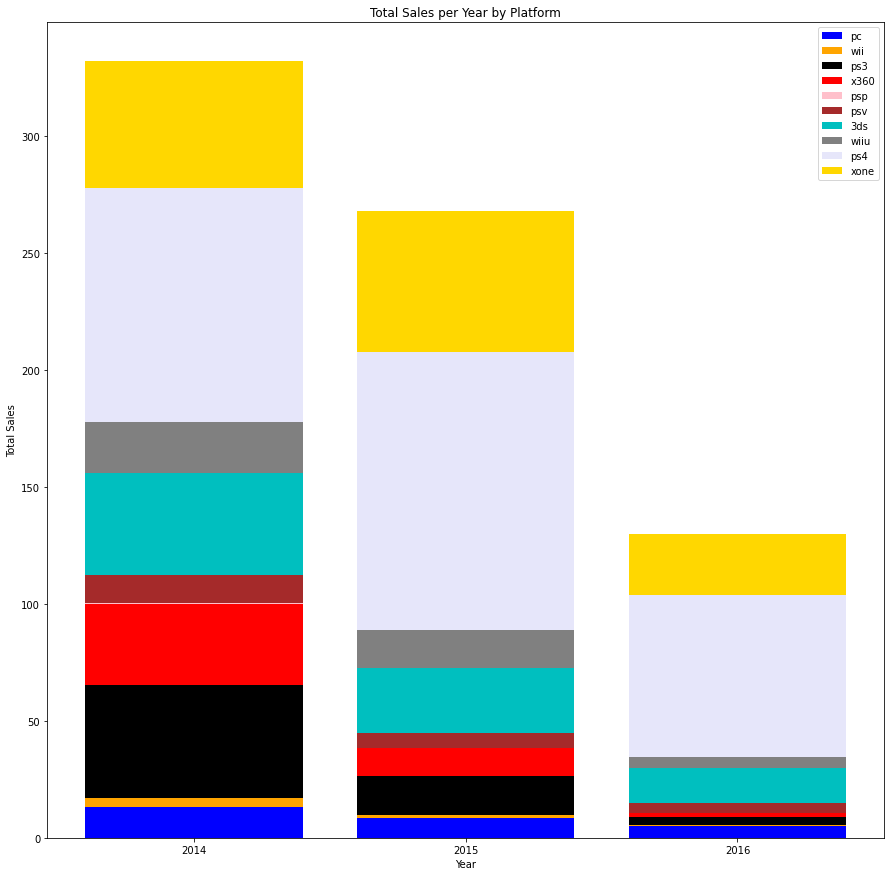

In [16]:
# create a pivot table that looks at the sales by year for each platform
yearly_sales = pd.pivot_table(videogame_2014_plus,index='Year_of_Release',columns='Platform', values='Total_sales', aggfunc='sum')
#turning Year into a column
yearly_sales.reset_index(level=0, inplace=True)
#filling in missing values with zeros
yearly_sales_withzeros = yearly_sales.fillna(0)
#creating a stacked bar chart which shows us the total sales per year split up by platform
fig, ax = plt.subplots(figsize=(15, 15))
ax.bar(yearly_sales_withzeros['Year_of_Release'],yearly_sales_withzeros['pc'],label='pc',color='b');
ax.bar(yearly_sales_withzeros['Year_of_Release'],yearly_sales_withzeros['wii'],label='wii',color='orange',bottom=yearly_sales_withzeros['pc']);
ax.bar(yearly_sales_withzeros['Year_of_Release'],yearly_sales_withzeros['ps3'],label='ps3',color='black',bottom=yearly_sales_withzeros['wii']+yearly_sales_withzeros['pc']);
ax.bar(yearly_sales_withzeros['Year_of_Release'],yearly_sales_withzeros['x360'],label='x360',color='r',bottom=yearly_sales_withzeros['ps3']+yearly_sales_withzeros['wii']+yearly_sales_withzeros['pc']);
ax.bar(yearly_sales_withzeros['Year_of_Release'],yearly_sales_withzeros['psp'],label='psp',color='pink',bottom=yearly_sales_withzeros['x360']+yearly_sales_withzeros['ps3']+yearly_sales_withzeros['wii']+yearly_sales_withzeros['pc']);
ax.bar(yearly_sales_withzeros['Year_of_Release'],yearly_sales_withzeros['psv'],label='psv',color='brown',bottom=yearly_sales_withzeros['psp']+yearly_sales_withzeros['x360']+yearly_sales_withzeros['ps3']+yearly_sales_withzeros['wii']+yearly_sales_withzeros['pc']);
ax.bar(yearly_sales_withzeros['Year_of_Release'],yearly_sales_withzeros['3ds'],label='3ds',color='c',bottom=yearly_sales_withzeros['psv']+yearly_sales_withzeros['psp']+yearly_sales_withzeros['x360']+yearly_sales_withzeros['ps3']+yearly_sales_withzeros['wii']+yearly_sales_withzeros['pc']);
ax.bar(yearly_sales_withzeros['Year_of_Release'],yearly_sales_withzeros['wiiu'],label='wiiu',color='grey',bottom=yearly_sales_withzeros['3ds']+yearly_sales_withzeros['psv']+yearly_sales_withzeros['psp']+yearly_sales_withzeros['x360']+yearly_sales_withzeros['ps3']+yearly_sales_withzeros['wii']+yearly_sales_withzeros['pc']);
ax.bar(yearly_sales_withzeros['Year_of_Release'],yearly_sales_withzeros['ps4'],label='ps4',color='lavender',bottom=yearly_sales_withzeros['wiiu']+yearly_sales_withzeros['3ds']+yearly_sales_withzeros['psv']+yearly_sales_withzeros['psp']+yearly_sales_withzeros['x360']+yearly_sales_withzeros['ps3']+yearly_sales_withzeros['wii']+yearly_sales_withzeros['pc']);
ax.bar(yearly_sales_withzeros['Year_of_Release'],yearly_sales_withzeros['xone'],label='xone',color='gold',bottom=yearly_sales_withzeros['ps4']+yearly_sales_withzeros['wiiu']+yearly_sales_withzeros['3ds']+yearly_sales_withzeros['psv']+yearly_sales_withzeros['psp']+yearly_sales_withzeros['x360']+yearly_sales_withzeros['ps3']+yearly_sales_withzeros['wii']+yearly_sales_withzeros['pc']);
ax.set_ylabel('Total Sales');
ax.set_xlabel('Year');
ax.set_title('Total Sales per Year by Platform');
ax.set_xticks(np.arange(2014, 2017, step=1))
ax.legend();


#### Conclusions

The above graph shows us that in 2014, the newer platforms started dominating that market. As you can see, in 2014 the Xbox One and PS4 outsold the Xbox 360 and PS3. It also shows WiiU sales were incredibly low for a new console, which may be why Nintendo did not wait long to launch the Nintendo Switch in 2017. 

### Total and Average Sales by Platform

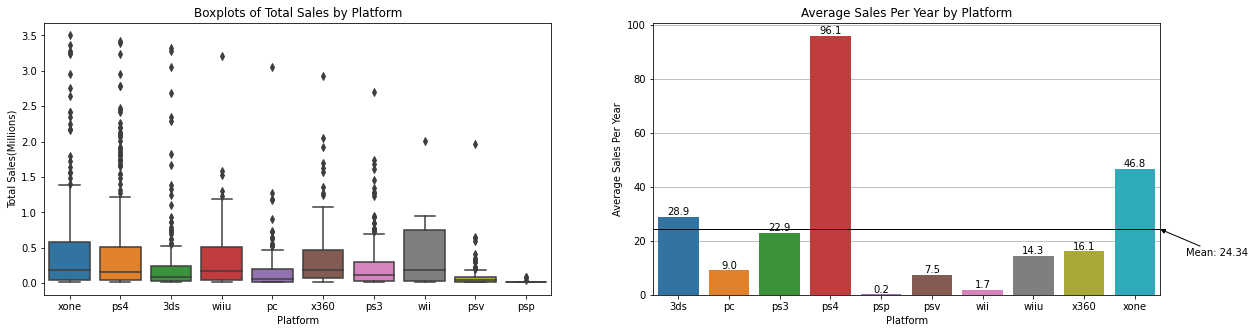

In [17]:
#calculating the average sales by console 
yearly_sales.loc['Total',1:] = yearly_sales.mean(axis=0)
#REMOVING OUTLIERS USING Z-SCORES
#creating an array of the z-scores for all non bounded variables
videogame_z_score = zscore(np.array(videogame_2014_plus[['Total_sales']]))
#removing all observations with a z-score > 3 for any of the variables
videogame_trimmed = videogame_2014_plus[(abs(videogame_z_score) < 3).all(axis=1)]

fig, ax = plt.subplots(1,2,figsize=(20, 5))
#creating a boxplot for each Platform based on Total Sales
sns.boxplot(ax=ax[0], x='Platform', y='Total_sales', data= videogame_trimmed);
ax[0].set_title('Boxplots of Total Sales by Platform');
ax[0].set_ylabel('Total Sales(Millions)');
ax[0].set_xlabel('Platform');
#creating a bar graph for the average sales per year for each platform. Reindexed to match boxplot.
sns.barplot(ax=ax[1],x=list(yearly_sales.columns[1:]),y=yearly_sales.iloc[-1 , 1:]);
ax[1].set_title('Average Sales Per Year by Platform');
ax[1].set_ylabel('Average Sales Per Year');
ax[1].set_xlabel('Platform');
#adding mean line
ax[1].axhline(yearly_sales.iloc[-1 , 1:].mean(), color='black', linewidth=1);
#adding arrow and mean value on the side
ax[1].annotate('Mean: {:0.2f}'.format(yearly_sales.iloc[-1 , 1:].mean()),xy=(1,yearly_sales.iloc[-1 , 1:].mean()), xycoords=('axes fraction','data'),xytext=(1.05,yearly_sales.iloc[-1 , 1:].mean()-10),arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='arc'));
#adding values on the top of bars
ax[1].bar_label(ax[1].containers[0],fmt='%.1f');
#adding y axis gridlines
ax[1].set_axisbelow(True);
ax[1].yaxis.grid(zorder=0);


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 
       
Ok, Ben, logic of the analysis is correct, but it is better to change the lower border of the current period and include only relevant platforms.

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
The same error for plot as above.
        
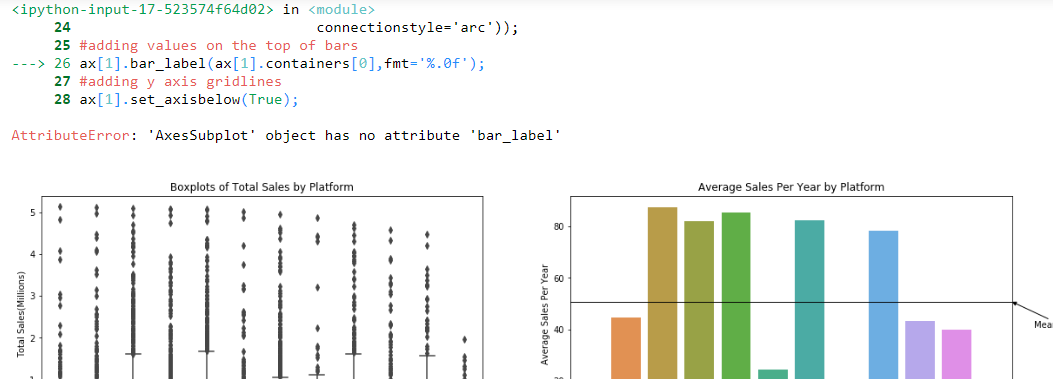

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>
        
Code works! And agaib, the visualization is amazing:)

#### Conclusions

To start off I trimmed the data when looking at the boxplots of total sales by platform. I did this because there are games that are huge outliers in terms of total sales. For example, there is no system with a median total sales higher than half a million dollars, yet, Wii Sports had 82.54 Million Sales, which over 160 times larger than the median Wii game. 

When looking at the boxplots, it is clear that, for all platforms, most games make under 1 million dollars in total sales. When looking at the boxplots, the main trend I notice is that handheld platforms have a much smaller interquartile range than home platforms. This tells us that more handheld games will have sales very close to the median. 

When it comes to average sales per year by platform, the PS4 is dominating the market with its two main competitors in household platforms, the Xbox One and WiiU, both averaging less than half the sales per year. 

### User/Critic Scores and Total Sales Relationship on the PS4

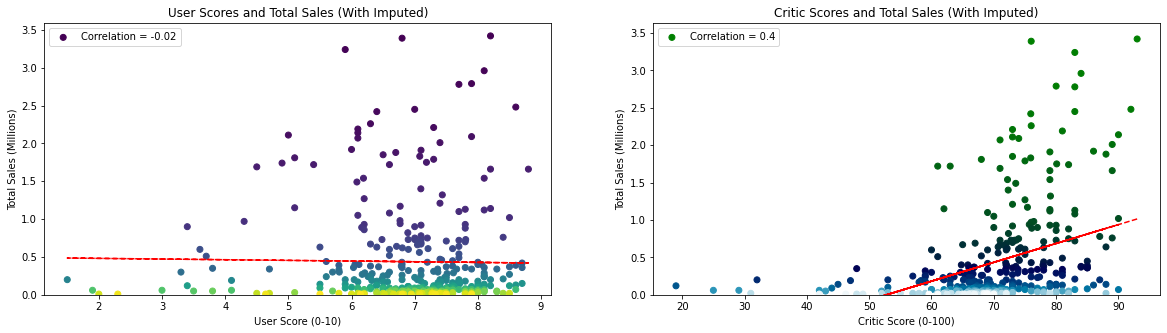

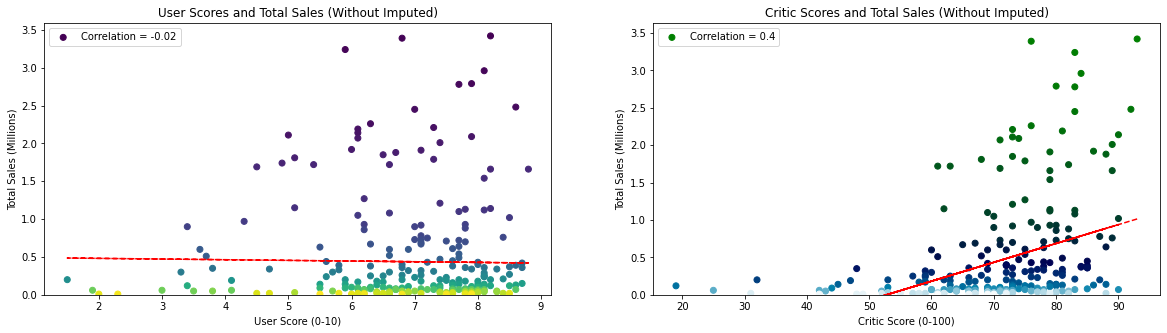

In [18]:
#limited data to only the ps4
videogame_trimmed_onlyps4 = videogame_trimmed[videogame_trimmed['Platform']=='ps4']
#creating an list of values for each data point to use when creating a color palette
t = np.arange(354)
t1 = np.arange(224)
t2 = np.arange(219)

#creating graphs
fig, ax = plt.subplots(1,2,figsize=(20, 5))
x=videogame_trimmed_onlyps4['User_Score']
y=videogame_trimmed_onlyps4['Total_sales']
w=videogame_trimmed_onlyps4['Critic_Score']
#creating a scatter plot with user scores and total sales
ax[0].scatter(x='User_Score',y='Total_sales',data=videogame_trimmed_onlyps4, c=t, cmap='viridis',label='Correlation = {0}'.format(np.round(np.corrcoef(x,y)[0,1], 2)));
#creating a trendline 
z = np.polyfit(x,y,1)
p = np.poly1d(z)
ax[0].plot(x,p(x),"r--");
#setting an axis limit so graphs dont show us negative values
ax[0].set_ylim(0);
ax[0].legend();
ax[0].set_title('User Scores and Total Sales (With Imputed)');
ax[0].set_ylabel('Total Sales (Millions)');
ax[0].set_xlabel('User Score (0-10)');
#creating a scatter plot with critic scores and total sales
ax[1].scatter(x='Critic_Score',y='Total_sales',data=videogame_trimmed_onlyps4, c=t, cmap='ocean', label='Correlation = {0}'.format(np.round(np.corrcoef(w,y)[0,1], 2)));
#creating a trendline
q = np.polyfit(w,y,1)
s = np.poly1d(q)
ax[1].plot(w,s(w),"r--");
#setting an axis limit so graphs dont show us negative values
ax[1].set_ylim(0);
ax[1].legend();
ax[1].set_title('Critic Scores and Total Sales (With Imputed)');
ax[1].set_ylabel('Total Sales (Millions)');
ax[1].set_xlabel('Critic Score (0-100)');

#looking at scatterplots without imputated data
ps4_games_notnull_user = list(videogame_df[(videogame_df['User_Score'].notnull()) & (videogame_df['Platform'] == 'ps4')]['Name'])
ps4_games_notnull_critic =  list(videogame_df[(videogame_df['Critic_Score'].notnull()) & (videogame_df['Platform'] == 'ps4')]['Name'])
fig, ax = plt.subplots(1,2,figsize=(20, 5))
#creating a scatter plot with user scores and total sales with data from only non imputed critic data
ax[0].scatter(x='User_Score',y='Total_sales',data=videogame_trimmed_onlyps4[videogame_trimmed_onlyps4['Name'].isin(ps4_games_notnull_user)], c=t1, cmap='viridis',label='Correlation = {0}'.format(np.round(np.corrcoef(x,y)[0,1], 2)));
#creating a trendline 
z = np.polyfit(x,y,1)
p = np.poly1d(z)
ax[0].plot(x,p(x),"r--");
#setting an axis limit so graphs dont show us negative values
ax[0].set_ylim(0);
ax[0].legend();
ax[0].set_title('User Scores and Total Sales (Without Imputed)');
ax[0].set_ylabel('Total Sales (Millions)');
ax[0].set_xlabel('User Score (0-10)');
#creating a scatter plot with critic scores and total sales
ax[1].scatter(x='Critic_Score',y='Total_sales',data=videogame_trimmed_onlyps4[videogame_trimmed_onlyps4['Name'].isin(ps4_games_notnull_critic)],c=t2, cmap='ocean', label='Correlation = {0}'.format(np.round(np.corrcoef(w,y)[0,1], 2)));
#creating a trendline
q = np.polyfit(w,y,1)
s = np.poly1d(q)
ax[1].plot(w,s(w),"r--");
#setting an axis limit so graphs dont show us negative values
ax[1].set_ylim(0);
ax[1].legend();
ax[1].set_title('Critic Scores and Total Sales (Without Imputed)');
ax[1].set_ylabel('Total Sales (Millions)');
ax[1].set_xlabel('Critic Score (0-100)');



#### Conclusions

When looking at the relationship between user and critic scores and total sales, I decided it was necessary to use the trimmed data as outliers could pull our trendlines upwards and give us incorrect conclusions on the relationship. I also chose to focus on the PS3 as it was the most popular platform during this timeframe. 

These two scatter plots tell us two slightly different stories. There seems to be no relationship between PS4 user scores and total sales with a correlation coefficient of -0.02. Contrastingly, there seems to be a slight positive correlation between critic scores and total sales with a correlation coefficient of 0.39. 

I ran the analysis without the imputed values, but that did not change the results. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, it is really great that you conducted the correlation analysis for data that has no imputed values instead of missing ones.

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
It is better to choose one of the actual platfors for analysis at this step of the analysis, pay more attention to the PS4 (X360 can be considered as outdated platform)

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>
        
Ok, agree with your improvements at this atep of the analysis!

### PS4 Sales vs Other Platforms

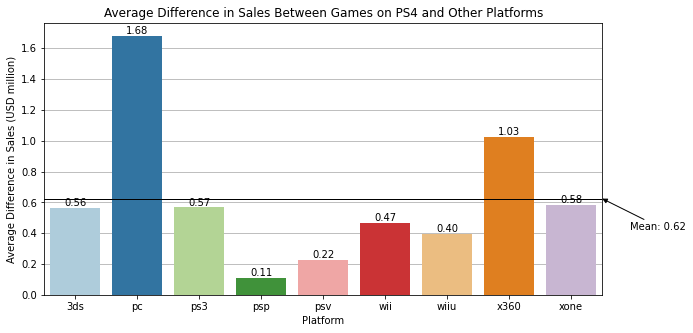

In [19]:
#getting a list of games that were on the ps4
games_list_ps4 = list(videogame_2014_plus[videogame_2014_plus['Platform']=='ps4']['Name'])
#getting data on the ps4 games on other consoles
ps4_games_other_consoles = videogame_2014_plus[(videogame_2014_plus['Name'].isin(games_list_ps4) == True)]
#creating a table of each game with each platform and its sales on that platform
ps4_games_pivot = ps4_games_other_consoles.pivot_table(index='Name',columns='Platform',values='Total_sales', aggfunc='sum')
#for each console, finding the difference between the sales it did for a game vs the ps4.
console_names = []
for x in ps4_games_pivot.columns:
    if x != 'ps4':
        console_names.append(x)
        ps4_games_pivot[x+'difference'] = ps4_games_pivot['ps4'] - ps4_games_pivot[x]

#calculating the average difference between the ps4 and other consoles 

fig, ax = plt.subplots(1,1,figsize=(10, 5))
#creating a bar chart of the average difference in sales between the xbox 360 and other consoles
ax=sns.barplot(x=console_names,y=ps4_games_pivot.iloc[:,10:].mean(axis=0),palette='Paired');
ax.set_title('Average Difference in Sales Between Games on PS4 and Other Platforms');
ax.set_ylabel('Average Difference in Sales (USD million)');
ax.set_xlabel('Platform');
#creating a mean line
ax.axhline(ps4_games_pivot.iloc[:,10:].mean(axis=0).mean(), color='black', linewidth=1);
#creating an arrow and mean value on the side
ax.annotate('Mean: {:0.2f}'.format(ps4_games_pivot.iloc[:,10:].mean(axis=0).mean()),xy=(1,ps4_games_pivot.iloc[:,10:].mean(axis=0).mean()), xycoords=('axes fraction','data'),xytext=(1.05,ps4_games_pivot.iloc[:,10:].mean(axis=0).mean()-0.2),arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='arc'));
#adding values to the top of bars and adding y axis gridlines
ax.bar_label(ax.containers[0],fmt='%.2f');
ax.set_axisbelow(True);
ax.yaxis.grid(zorder=0);

#### Conclusions

Looking at the graph, the PS4 outperforms every other platform. On average, it made 1.68 million dollars more on a game than that same game on PC. This graph clearly shows another example of the dominance the PS4 had from 2014 to 2016. 

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
The same error for plot as above.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍</b>

### Games Made and Average Sales by Genre

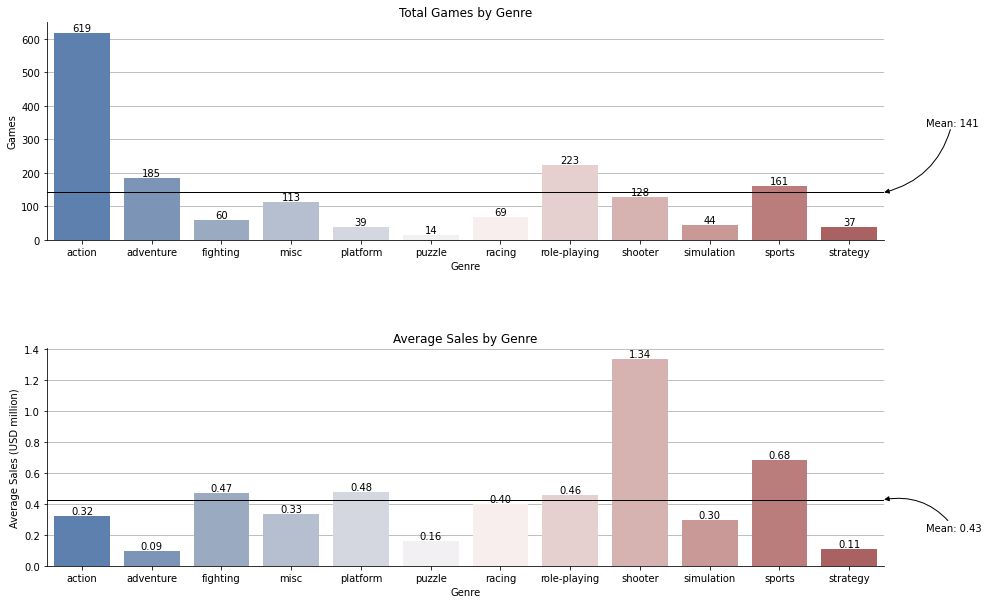

In [20]:
#creating a pivot table of average sales by genre
genre_sales = videogame_2014_plus.pivot_table(index = 'Genre',values='Total_sales',aggfunc='mean')
#creating a list of all genres
genre_list = list(genre_sales.index)
#creating a pivot table of total games made by genre
genre_count = videogame_2014_plus.pivot_table(index='Genre',values='Total_sales',aggfunc='count')
fig, ax = plt.subplots(2,1,figsize=(15, 10))
#plotting bars for the total games made by genre
sns.barplot(ax=ax[0],x=genre_list,y=genre_count['Total_sales'],palette='vlag');
ax[0].set_title('Total Games by Genre');
ax[0].set_ylabel('Games');
ax[0].set_xlabel('Genre');
#adding mean line
ax[0].axhline(genre_count['Total_sales'].mean(), color='black', linewidth=1);
#adding mean arrow and mean value on side
ax[0].annotate('Mean: {:0.0f}'.format(genre_count['Total_sales'].mean()),xy=(1,genre_count['Total_sales'].mean()), xycoords=('axes fraction','data'),xytext=(1.05,genre_count['Total_sales'].mean()+200),arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='arc3,rad=-.3'));
#adding values on top of bars
ax[0].bar_label(ax[0].containers[0],fmt='%.0f');
#removing spines from top and right
ax[0].spines['top'].set_visible(False);
ax[0].spines['right'].set_visible(False);
#adding horizontal gridlines
ax[0].set_axisbelow(True);
ax[0].yaxis.grid(zorder=0);


#plotting bars for average sales by genre
sns.barplot(ax=ax[1],x=genre_list,y=genre_sales['Total_sales'],palette='vlag');
ax[1].set_title('Average Sales by Genre');
ax[1].set_ylabel('Average Sales (USD million)');
ax[1].set_xlabel('Genre');
#adding mean line
ax[1].axhline(genre_sales['Total_sales'].mean(), color='black', linewidth=1);
#adding arrow and mean value on side
ax[1].annotate('Mean: {:0.2f}'.format(genre_sales['Total_sales'].mean()),xy=(1,genre_sales['Total_sales'].mean()), xycoords=('axes fraction','data'),xytext=(1.05,genre_sales['Total_sales'].mean()-0.2),arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='arc3,rad=.3'));
#adding values on top of bars
ax[1].bar_label(ax[1].containers[0],fmt='%.2f');
#removing spines from top and right
ax[1].spines['top'].set_visible(False);
ax[1].spines['right'].set_visible(False);
#adding horizontal gridlines
ax[1].set_axisbelow(True);
ax[1].yaxis.grid(zorder=0);
#adding space betweeen the graphs
plt.subplots_adjust(hspace = 0.5);

#### Conclusions

When looking at each genre, the highest percentage of games are action with more than double the amount of games of any other genre. Yet, as far as average sales, shooter games sell the best. I think this is due to the large popularity shooter franchises such as Call of Duty, Halo, and Battlefield. 

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
Ok, error again and one plot is blank
        
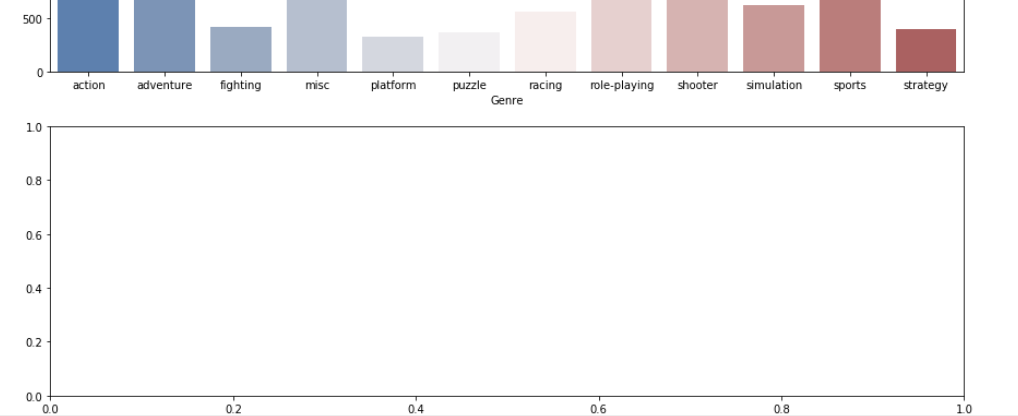

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
You can try to calculate not only sum but median or average sales per platform, the leader will change.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>
        
Ok, it is great that you calculated average sales by genre!

### Scores by Genre

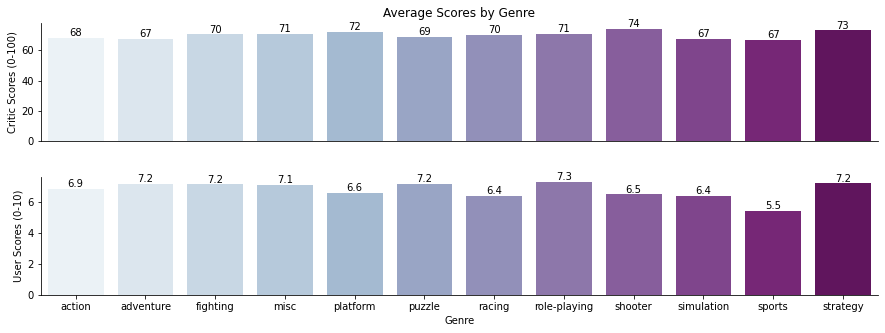

In [21]:
genre_scores = videogame_2014_plus.pivot_table(index='Genre',values=['Critic_Score','User_Score'],aggfunc='mean')
fig, ax = plt.subplots(2,1,figsize=(15, 5))
sns.barplot(ax=ax[0],x = genre_scores.index,y = genre_scores['Critic_Score'],palette='BuPu')
ax[0].set_ylabel('Critic Scores (0-100)')
ax[0].xaxis.set_visible(False) 
ax[0].bar_label(ax[0].containers[0],fmt='%.0f');
ax[0].set_title('Average Scores by Genre')
ax[0].spines['top'].set_visible(False);
ax[0].spines['right'].set_visible(False);
sns.barplot(ax=ax[1],x = genre_scores.index,y = genre_scores['User_Score'],palette='BuPu')
ax[1].set_ylabel('User Scores (0-10)')
ax[1].bar_label(ax[1].containers[0],fmt='%.1f');
ax[1].spines['top'].set_visible(False);
ax[1].spines['right'].set_visible(False);
plt.subplots_adjust(hspace = 0.3);

#### Conclusions

There do seem to be some slight differences in the preferences of users and critics when it comes to genres. Users give harsher reviews than critics on sports, shooter, platform, and racing games. Yet, Users seem to enjoy puzzle and adventure games more than critics. Overall, I find it surprising that users gave shooter games such low ratings as we saw above that shooters have the highest average sales per game. This lets us know that there might not be a strong connection between user scores and sales. 

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
Ok, error again and one plot is blank
        

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>
        
I can see all your plots, good job!

### Rating Prevelance By Genre

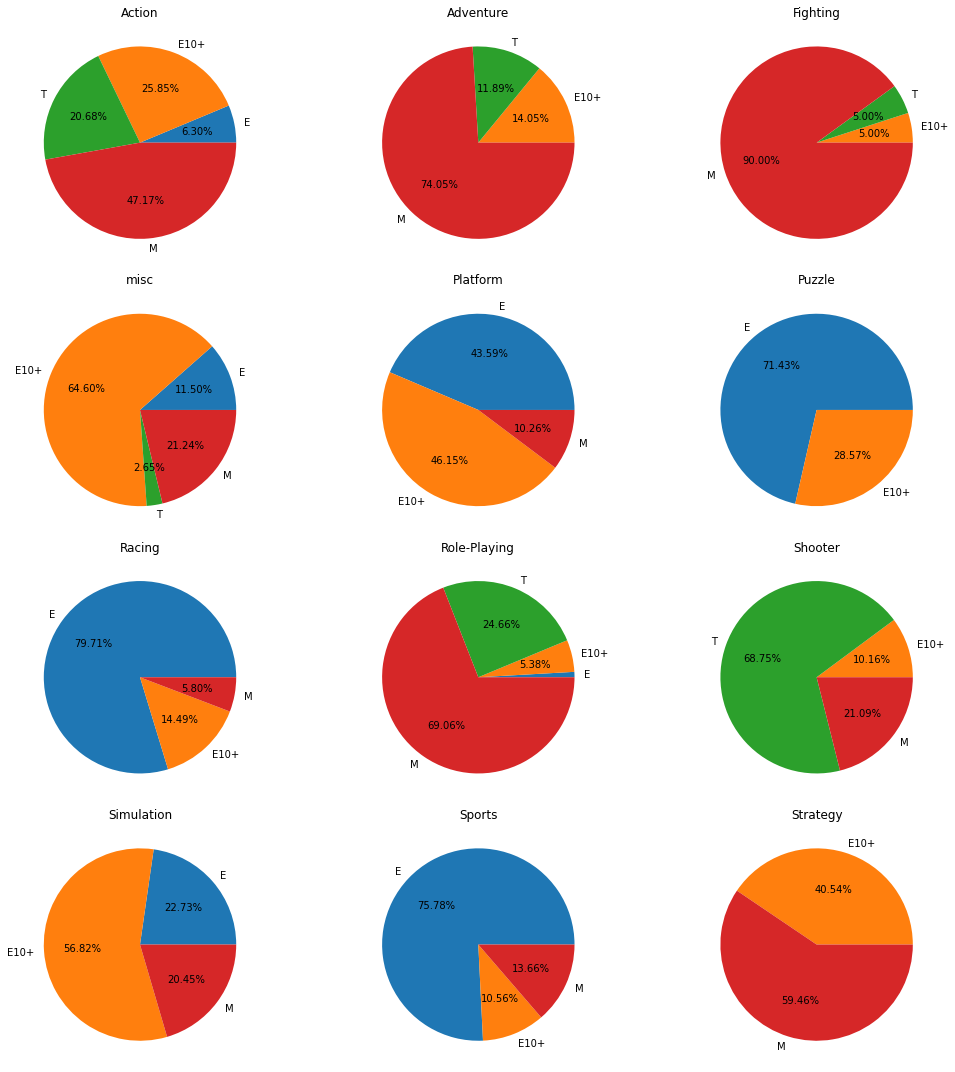

In [22]:
#calculating the number of games with each rating by genre
genre_ratings = videogame_2014_plus.pivot_table(index='Rating',columns='Genre', values='Total_sales',aggfunc='count')
#making rating a column
#if a genre has zero games with a rating turn it to a 0 value
genre_ratings.fillna(0,inplace=True)
#create a function that removes the ratings with zero percent in certain genres from being shown on the pie chart
def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 1 else ''
#creating pie charts for each genre
fig, ax = plt.subplots(4,3,figsize=(15, 15))
ax[0,0].pie(genre_ratings['action'],labels=['E','E10+','T','M'],autopct=my_autopct)
ax[0,0].set_title('Action')
ax[0,1].pie(genre_ratings['adventure'],labels=['','E10+','T','M'],autopct=my_autopct)
ax[0,1].set_title('Adventure')
ax[0,2].pie(genre_ratings['fighting'],labels=['','E10+','T','M'],autopct=my_autopct)
ax[0,2].set_title('Fighting')
ax[1,0].pie(genre_ratings['misc'],labels=['E','E10+','T','M'],autopct=my_autopct)
ax[1,0].set_title('misc')
ax[1,1].pie(genre_ratings['platform'],labels=['E','E10+','','M'],autopct=my_autopct)
ax[1,1].set_title('Platform')
ax[1,2].pie(genre_ratings['puzzle'],labels=['E','E10+','',''],autopct=my_autopct)
ax[1,2].set_title('Puzzle')
ax[2,0].pie(genre_ratings['racing'],labels=['E','E10+','','M'],autopct=my_autopct)
ax[2,0].set_title('Racing')
ax[2,1].pie(genre_ratings['role-playing'],labels=['E','E10+','T','M'],autopct=my_autopct)
ax[2,1].set_title('Role-Playing')
ax[2,2].pie(genre_ratings['shooter'],labels=['','E10+','T','M'],autopct=my_autopct)
ax[2,2].set_title('Shooter')
ax[3,0].pie(genre_ratings['simulation'],labels=['E','E10+','','M'],autopct=my_autopct)
ax[3,0].set_title('Simulation')
ax[3,1].pie(genre_ratings['sports'],labels=['E','E10+','','M'],autopct=my_autopct)
ax[3,1].set_title('Sports')
ax[3,2].pie(genre_ratings['strategy'],labels=['','E10+','','M'],autopct=my_autopct)
ax[3,2].set_title('Strategy')
plt.tight_layout()

#### Conclusions

When looking at each pie, we can get a sense of the target audience of each genre. Sports, racing, and puzzle games are mostly rated E for everyone. Contrastingly, fighting, role-playing, strategy and adventure games are mostly rated M for people 17 and older. The genre with the most variety among their ratings is action with no rating claiming higher than 45% of the games. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Amazing job! It is really cool thet you went further and conducted additional analysis adn investigations. Looks great!

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
        
Oops, key value error here, please, try to fix this:
        
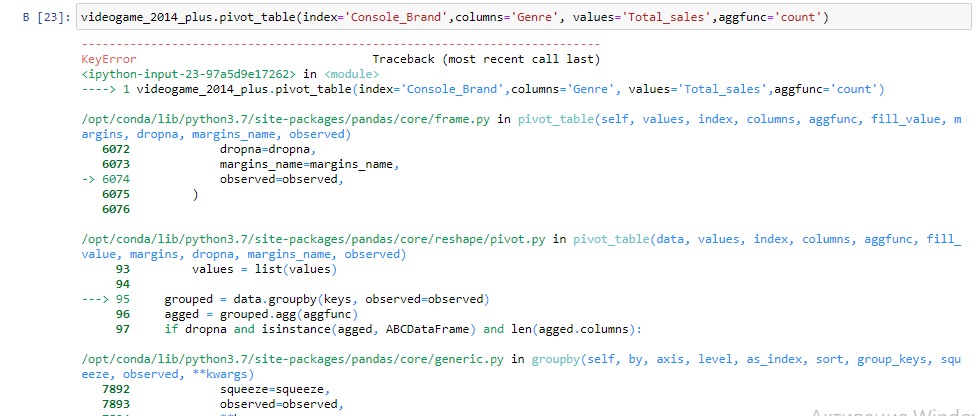
        
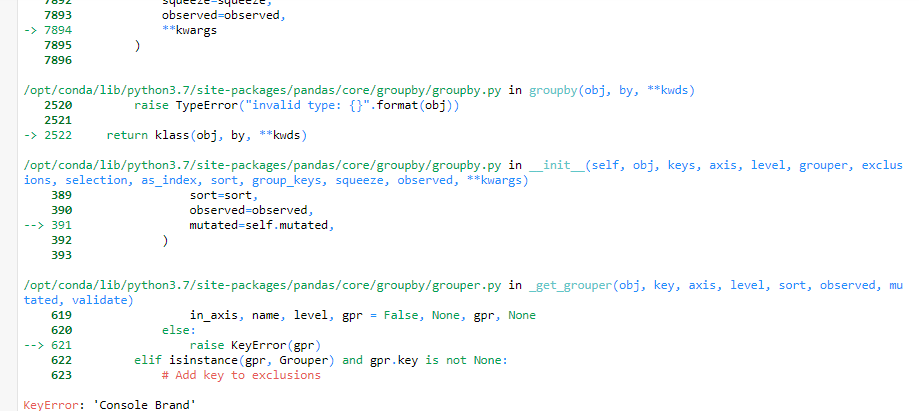

<font color='Purple'>Student's commentary Version 2:</font> Sorry! Forgot to delete this when testing something! oops haha

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: third iteration of the review<a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, now everything is alright!

### Genres by Platform Brand

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


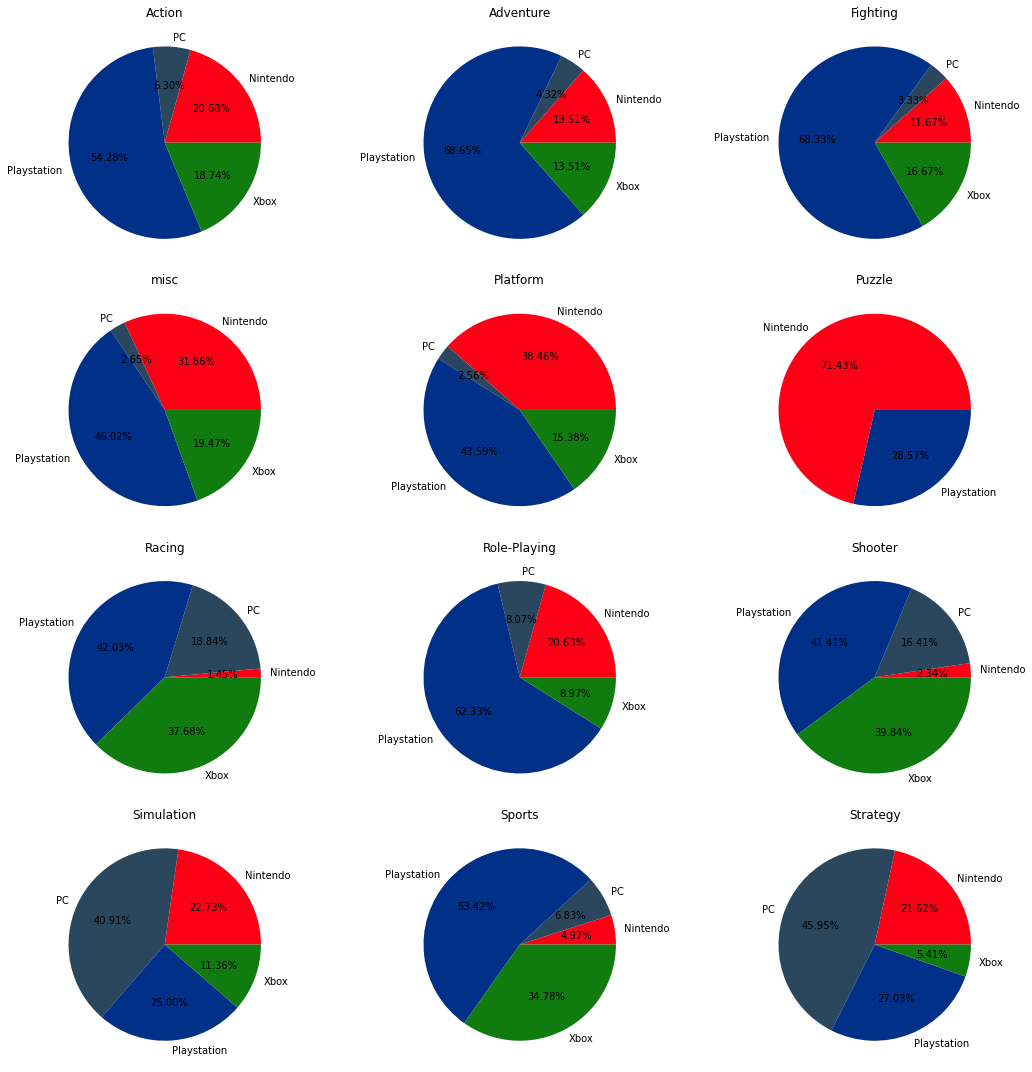

In [23]:
#creating a function to place each platform with the brand that makes it
def console_brand(platform):
    if (platform == 'wii') | (platform == 'wiiu') | (platform == '3ds'):
        return 'Nintendo'
    elif (platform == 'ps3') | (platform == 'ps4') | (platform == 'psp') | (platform == 'psv') :
        return 'Playstation'
    elif (platform == 'x360') | (platform == 'xone'):
        return 'Xbox'
    else:
        return 'PC'
#adding the brand column to the dataframe
videogame_2014_plus['Console_Brand']=videogame_2014_plus['Platform'].apply(console_brand)

#creating a pivot table to find the number of games per genre by brand
genre_console = videogame_2014_plus.pivot_table(index='Console_Brand',columns='Genre', values='Total_sales',aggfunc='count')
#filling missing values with zero
genre_console.fillna(0,inplace=True)

#creating the pies for each brand with the brand color to fill the pie
fig, ax = plt.subplots(4,3,figsize=(15, 15))
ax[0,0].pie(genre_console['action'],labels=['Nintendo','PC','Playstation','Xbox'],autopct=my_autopct, colors = ['#fe0016', '#2a475e', '#003087', '#107C10'])
ax[0,0].set_title('Action')
ax[0,1].pie(genre_console['adventure'],labels=['Nintendo','PC','Playstation','Xbox'],autopct=my_autopct, colors = ['#fe0016', '#2a475e', '#003087', '#107C10'])
ax[0,1].set_title('Adventure')
ax[0,2].pie(genre_console['fighting'],labels=['Nintendo','PC','Playstation','Xbox'],autopct=my_autopct, colors = ['#fe0016', '#2a475e', '#003087', '#107C10'])
ax[0,2].set_title('Fighting')
ax[1,0].pie(genre_console['misc'],labels=['Nintendo','PC','Playstation','Xbox'],autopct=my_autopct, colors = ['#fe0016', '#2a475e', '#003087', '#107C10'])
ax[1,0].set_title('misc')
ax[1,1].pie(genre_console['platform'],labels=['Nintendo','PC','Playstation','Xbox'],autopct=my_autopct, colors = ['#fe0016', '#2a475e', '#003087', '#107C10'])
ax[1,1].set_title('Platform')
ax[1,2].pie(genre_console['puzzle'],labels=['Nintendo','','Playstation',''],autopct=my_autopct, colors = ['#fe0016', '#2a475e', '#003087', '#107C10'])
ax[1,2].set_title('Puzzle')
ax[2,0].pie(genre_console['racing'],labels=['Nintendo','PC','Playstation','Xbox'],autopct=my_autopct, colors = ['#fe0016', '#2a475e', '#003087', '#107C10'])
ax[2,0].set_title('Racing')
ax[2,1].pie(genre_console['role-playing'],labels=['Nintendo','PC','Playstation','Xbox'],autopct=my_autopct, colors = ['#fe0016', '#2a475e', '#003087', '#107C10'])
ax[2,1].set_title('Role-Playing')
ax[2,2].pie(genre_console['shooter'],labels=['Nintendo','PC','Playstation','Xbox'],autopct=my_autopct, colors = ['#fe0016', '#2a475e', '#003087', '#107C10'])
ax[2,2].set_title('Shooter')
ax[3,0].pie(genre_console['simulation'],labels=['Nintendo','PC','Playstation','Xbox'],autopct=my_autopct, colors = ['#fe0016', '#2a475e', '#003087', '#107C10'])
ax[3,0].set_title('Simulation')
ax[3,1].pie(genre_console['sports'],labels=['Nintendo','PC','Playstation','Xbox'],autopct=my_autopct, colors = ['#fe0016', '#2a475e', '#003087', '#107C10'])
ax[3,1].set_title('Sports')
ax[3,2].pie(genre_console['strategy'],labels=['Nintendo','PC','Playstation','Xbox'],autopct=my_autopct, colors = ['#fe0016', '#2a475e', '#003087', '#107C10'])
ax[3,2].set_title('Strategy')
plt.tight_layout()

#### Conclusions

When looking at the breakdown of genres by platform brand: 

* Nintendo dominates the puzzle game sphere 
* PC is the leading platform for simulation and strategy games
* Xbox does is not the leading platform in any genre, but is very close among shooter games. 
* Playstation has over 50% of the sports, role-playing, action, adventure, and fighting games. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍</b> 
        

## Regional Analysis

### Top Platforms By Region

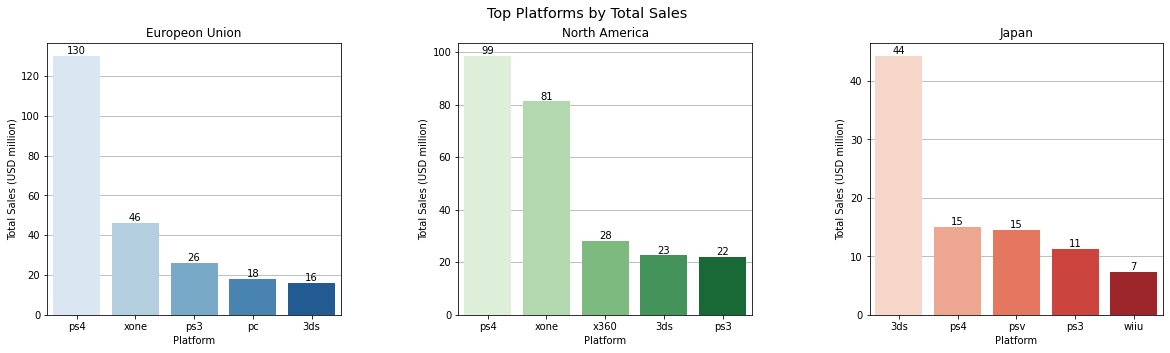

In [24]:
#creating table of the sales of each platform in each region
top_platforms_region = videogame_2014_plus.pivot_table(columns='Platform',values=['NA_sales','EU_sales','JP_sales'],aggfunc='sum')
#pulling the top 5 platforms in each region 
top_platforms_EU = top_platforms_region.T.nlargest(5,'EU_sales').drop(columns=['JP_sales','NA_sales'])
top_platforms_EU.reset_index(level=0, inplace=True)
top_platforms_NA = top_platforms_region.T.nlargest(5,'NA_sales').drop(columns=['JP_sales','EU_sales'])
top_platforms_NA.reset_index(level=0, inplace=True)
top_platforms_JP = top_platforms_region.T.nlargest(5,'JP_sales').drop(columns=['EU_sales','NA_sales'])
top_platforms_JP.reset_index(level=0, inplace=True)

fig, ax = plt.subplots(1,3,figsize=(20, 5))
#creating a bar graph with the top 5 platforms in the EU
sns.barplot(ax=ax[0],x='Platform',y='EU_sales',data=top_platforms_EU,palette='Blues')
ax[0].set_title('Europeon Union')
ax[0].set_ylabel('Total Sales (USD million)')
ax[0].set_xlabel('Platform')
#adding y axis gridlines
ax[0].set_axisbelow(True);
ax[0].yaxis.grid(zorder=0);
#adding values on top of the bars
ax[0].bar_label(ax[0].containers[0],fmt='%.0f');
#creating a bar graph with the top 5 platforms in NA
sns.barplot(ax=ax[1],x='Platform',y='NA_sales',data=top_platforms_NA,palette='Greens')
ax[1].set_title('North America')
ax[1].set_ylabel('Total Sales (USD million)')
ax[1].set_xlabel('Platform')
#adding y axis gridlines
ax[1].set_axisbelow(True);
ax[1].yaxis.grid(zorder=0);
#adding values on top of bars
ax[1].bar_label(ax[1].containers[0],fmt='%.0f');
#creating a bar graph with the top 5 platforms in Japan
sns.barplot(ax=ax[2],x='Platform',y='JP_sales',data=top_platforms_JP,palette='Reds')
ax[2].set_title('Japan')
ax[2].set_ylabel('Total Sales (USD million)')
ax[2].set_xlabel('Platform')
#adding y axis gridlines
ax[2].set_axisbelow(True);
ax[2].yaxis.grid(zorder=0);
#adding values on top of bars
ax[2].bar_label(ax[2].containers[0],fmt='%.0f');
fig.suptitle('Top Platforms by Total Sales',size='x-large')
#putting space between the graphs
plt.subplots_adjust(wspace = 0.4);

#### Conclusions

In the EU, the PS4 had the most total sales followed by the Xbox One and the PS3. In North America, the PS4 also had the highest sales followed by the Xbox One and the Xbox 360. Lastly, in Japan, the 3DS led the country in sales with the PS4 and the PSV rounding out the top 3 respectively. The Japanese market seems to prioritize handheld systems as  of the top 3 are handheld and none of the top 3 in the EU and North America are handheld. A 2012 article claims the main reasons behind the high market presence of handheld systems in Japan is that due to the high use of mass transit. This places a premium on gaming systems that can be played on trains and buses. Source: <cite>[Kotaku][3]</cite>. 

[3]: https://kotaku.com/portable-gaming-rules-in-japan-5954757


<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
       
Despite your common logic is correct it is better to adjust the lower border of the current period and recheck your results, now the leaders in platforms in all regions are the platforms that are outdated. Also, code provides error and I cannot see two plots
        
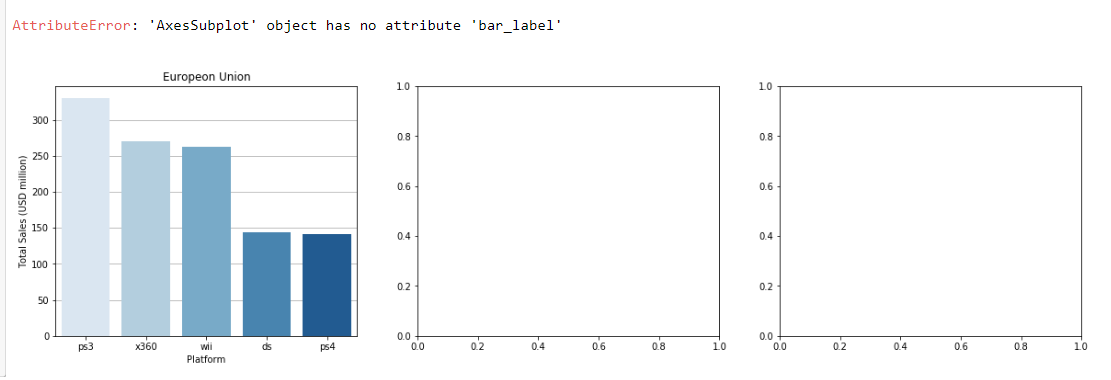

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>
        
Ok, this time code works well!

### Platform Sales by Region

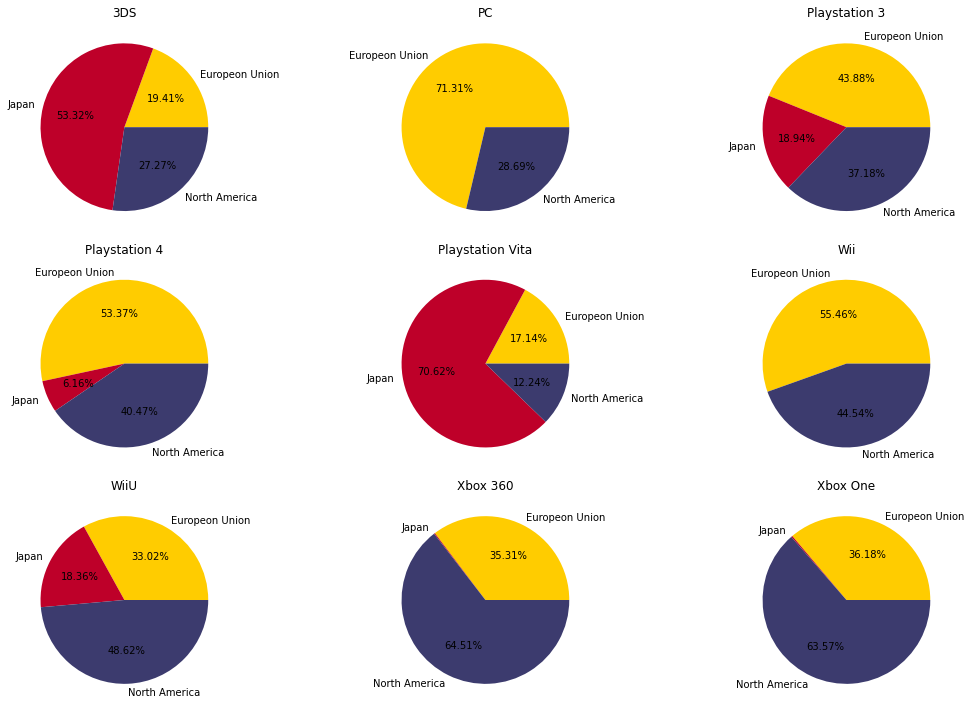

In [25]:
fig, ax = plt.subplots(3,3,figsize=(15, 10))
#creating pie charts for each platform and the percent of sales for that platform in each region. 
ax[0,0].pie(top_platforms_region['3ds'],labels=['Europeon Union','Japan','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[0,0].set_title('3DS')
ax[0,1].pie(top_platforms_region['pc'],labels=['Europeon Union','','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[0,1].set_title('PC')
ax[0,2].pie(top_platforms_region['ps3'],labels=['Europeon Union','Japan','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[0,2].set_title('Playstation 3')
ax[1,0].pie(top_platforms_region['ps4'],labels=['Europeon Union','Japan','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[1,0].set_title('Playstation 4')
ax[1,1].pie(top_platforms_region['psv'],labels=['Europeon Union','Japan','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[1,1].set_title('Playstation Vita')
ax[1,2].pie(top_platforms_region['wii'],labels=['Europeon Union','','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[1,2].set_title('Wii')
ax[2,0].pie(top_platforms_region['wiiu'],labels=['Europeon Union','Japan','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[2,0].set_title('WiiU')
ax[2,1].pie(top_platforms_region['x360'],labels=['Europeon Union','Japan','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[2,1].set_title('Xbox 360')
ax[2,2].pie(top_platforms_region['xone'],labels=['Europeon Union','Japan','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[2,2].set_title('Xbox One')
plt.tight_layout()


#### Conclusions

As stated above, handheld platforms have much higher Japanese presence than home platforms. Additionally, Xbox systems are dominated by North America. Lastly, the EU dominates PC gaming with aver 70% of sales coming from the EU. 

### Top Genres by Region

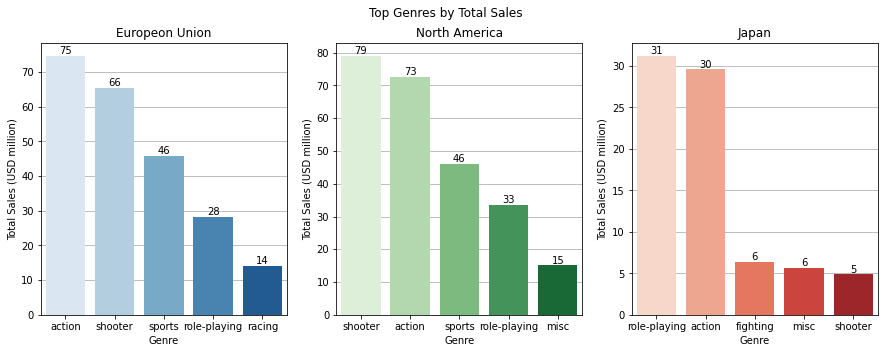

In [26]:
#creating a table of the top genres by region
top_genres_region = videogame_2014_plus.pivot_table(columns='Genre',values=['NA_sales','EU_sales','JP_sales'],aggfunc='sum')
#pulling the top 5 genres by each region
top_genres_EU = top_genres_region.T.nlargest(5,'EU_sales').drop(columns=['JP_sales','NA_sales'])
top_genres_EU.reset_index(level=0, inplace=True)
top_genres_NA = top_genres_region.T.nlargest(5,'NA_sales').drop(columns=['JP_sales','EU_sales'])
top_genres_NA.reset_index(level=0, inplace=True)
top_genres_JP = top_genres_region.T.nlargest(5,'JP_sales').drop(columns=['EU_sales','NA_sales'])
top_genres_JP.reset_index(level=0, inplace=True)

fig, ax = plt.subplots(1,3,figsize=(15, 5))
#creating a bar chart of the top genres in the EU
sns.barplot(ax=ax[0],x='Genre',y='EU_sales',data=top_genres_EU,palette='Blues');
ax[0].set_title('Europeon Union');
ax[0].set_ylabel('Total Sales (USD million)');
ax[0].set_xlabel('Genre');
#adding y axis gridlines
ax[0].set_axisbelow(True);
ax[0].yaxis.grid(zorder=0);
#adding values above the bars
ax[0].bar_label(ax[0].containers[0],fmt='%.0f');
#creating a bar chart of the top genres in NA
sns.barplot(ax=ax[1],x='Genre',y='NA_sales',data=top_genres_NA,palette='Greens');
ax[1].set_title('North America');
ax[1].set_ylabel('Total Sales (USD million)');
ax[1].set_xlabel('Genre');
#adding y axis gridlines 
ax[1].set_axisbelow(True);
ax[1].yaxis.grid(zorder=0);
#adding values above the bars
ax[1].bar_label(ax[1].containers[0],fmt='%.0f');
#creating a bar chart of the top genres in Japan
sns.barplot(ax=ax[2],x='Genre',y='JP_sales',data=top_genres_JP,palette='Reds');
ax[2].set_title('Japan');
ax[2].set_ylabel('Total Sales (USD million)');
ax[2].set_xlabel('Genre');
#adding y axis gridlines
ax[2].set_axisbelow(True);
ax[2].yaxis.grid(zorder=0);
#adding values above the bars
ax[2].bar_label(ax[2].containers[0],fmt='%.0f');
fig.suptitle('Top Genres by Total Sales');

#### Conclusions

North America and the EU have very similar genre preferences with the same top 4 genres. Contrastingly, Japan's top genre is role-playing games, which is not in the top 3 genres in the EU or North America. One possible explanation is the huge popularity of the Pokemon games in Japan. 


<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Needs fixing!🤔:</b> 
       
        
The same issues with code error and blank plots as above
        

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary:second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍</b>
 

### Genre Sales by Region

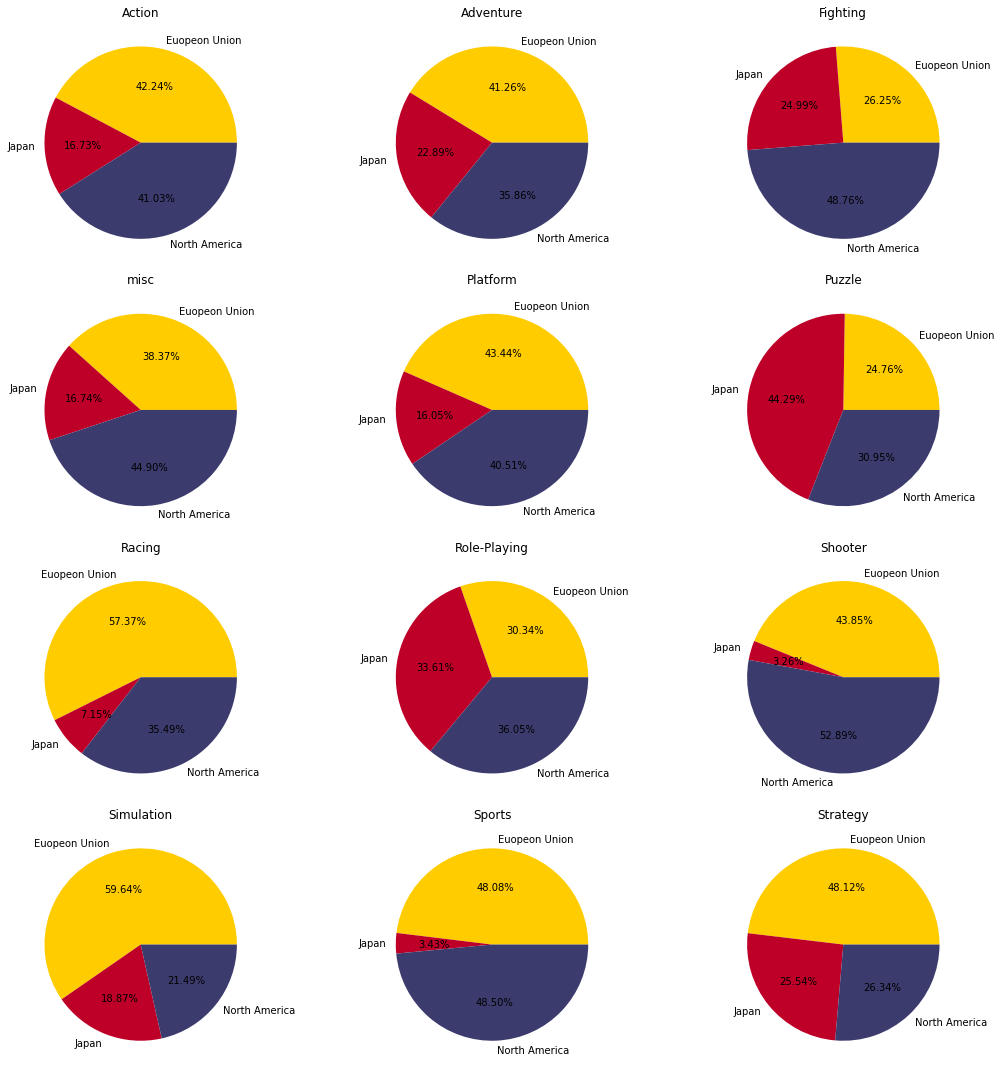

In [27]:
#creating pie charts for each genre based on the percent of sales from each region
fig, ax = plt.subplots(4,3,figsize=(15, 15))
ax[0,0].pie(top_genres_region['action'],labels=['Euopeon Union','Japan','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[0,0].set_title('Action')
ax[0,1].pie(top_genres_region['adventure'],labels=['Euopeon Union','Japan','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[0,1].set_title('Adventure')
ax[0,2].pie(top_genres_region['fighting'],labels=['Euopeon Union','Japan','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[0,2].set_title('Fighting')
ax[1,0].pie(top_genres_region['misc'],labels=['Euopeon Union','Japan','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[1,0].set_title('misc')
ax[1,1].pie(top_genres_region['platform'],labels=['Euopeon Union','Japan','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[1,1].set_title('Platform')
ax[1,2].pie(top_genres_region['puzzle'],labels=['Euopeon Union','Japan','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[1,2].set_title('Puzzle')
ax[2,0].pie(top_genres_region['racing'],labels=['Euopeon Union','Japan','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[2,0].set_title('Racing')
ax[2,1].pie(top_genres_region['role-playing'],labels=['Euopeon Union','Japan','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[2,1].set_title('Role-Playing')
ax[2,2].pie(top_genres_region['shooter'],labels=['Euopeon Union','Japan','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[2,2].set_title('Shooter')
ax[3,0].pie(top_genres_region['simulation'],labels=['Euopeon Union','Japan','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[3,0].set_title('Simulation')
ax[3,1].pie(top_genres_region['sports'],labels=['Euopeon Union','Japan','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[3,1].set_title('Sports')
ax[3,2].pie(top_genres_region['strategy'],labels=['Euopeon Union','Japan','North America'],autopct=my_autopct, colors=['#ffcc00','#be0029', '#3c3b6e'])
ax[3,2].set_title('Strategy')
plt.tight_layout()


#### Conclusions

There are a few things I want to note from the pie charts above. First, shooters and sports games are much less popular in Japan than in the EU or North America. Second, the EU has a higher market presence in racing and simulation games than other genres. Lastly, there is not nearly as much variation in market presence by genres compared to the variation in platforms seen above.

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b>  
       
Again, I would like to recommend you to change the lower border of the current period and recheck the results, they can adjust.

### The Effect of ESRB Ratings on Sales by Region

In [28]:
#running a regression 
#creating a function that puts some key results of the regression into a dataframe
def results_summary_to_dataframe(results):
    '''take the result of an statsmodel results table and transforms it into a dataframe'''
    pvals = results.pvalues
    coeff = results.params
    stdev = results.bse
    conf_lower = results.conf_int()[0]
    conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({"pvals":pvals,
                               "coeff":coeff,
                               "conf_lower":conf_lower,
                               "conf_higher":conf_higher,
                               "std":stdev
                                })

    #Reordering...
    results_df = results_df[["coeff","std", "pvals","conf_lower","conf_higher"]]
    return results_df

#EU Regression
fit_eu = ols('EU_sales ~ C(Rating)', data=videogame_2014_plus).fit(cov_type='HC3') 
regression_results_EU = results_summary_to_dataframe(fit_eu).drop(columns=["conf_lower","conf_higher",'pvals']).drop('Intercept',axis=0)
regression_results_EU['region'] = 'EU'

#NA Regression
fit_na = ols('NA_sales ~ C(Rating)', data=videogame_2014_plus).fit(cov_type='HC3') 
regression_results_NA = results_summary_to_dataframe(fit_na).drop(columns=["conf_lower","conf_higher",'pvals']).drop('Intercept',axis=0) 
regression_results_NA['region'] = 'NA'

#JP Regression
fit_jp = ols('JP_sales ~ C(Rating)', data=videogame_2014_plus).fit(cov_type='HC3') 
regression_results_JP = results_summary_to_dataframe(fit_jp).drop(columns=["conf_lower","conf_higher",'pvals']).drop('Intercept',axis=0)
regression_results_JP['region'] = 'JP'



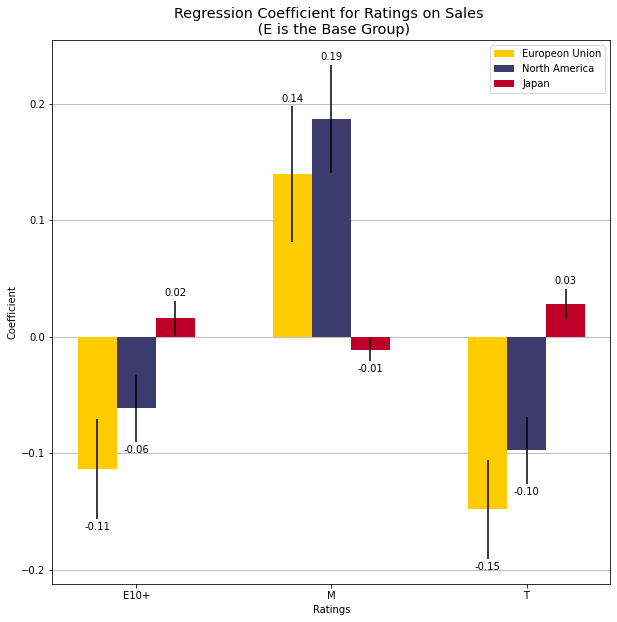

In [29]:
#a list of the non base group ratings
x=['E10+','M','T']
#creating the x-axis values from that list
x_axis = np.arange(len(x))
fig, ax = plt.subplots(figsize=(10, 10))
#adding a bar for each coefficient value from each region for each rating with std error black lines 
bar_1 = ax.bar(x_axis -0.2,'coeff',data=regression_results_EU, width=0.2, color='#ffcc00',yerr='std', align='center',label='Europeon Union')
bar_2 = ax.bar(x_axis ,'coeff',data=regression_results_NA, width=0.2, color='#3c3b6e',yerr='std', align='center',label='North America')
bar_3 = ax.bar(x_axis +0.2,'coeff',data=regression_results_JP, width=0.2, color='#be0029',yerr='std', align='center',label='Japan')
plt.xticks(x_axis, x);
plt.legend();
plt.xlabel("Ratings");
plt.ylabel("Coefficient");
plt.title("Regression Coefficient for Ratings on Sales \n (E is the Base Group)",size='x-large');
#adding y-axis gridlines
ax.set_axisbelow(True);
ax.yaxis.grid(zorder=0);
#adding the coefficient values above each bar
ax.bar_label(bar_1, padding=3,fmt='%.2f');
ax.bar_label(bar_2, padding=3,fmt='%.2f');
ax.bar_label(bar_3, padding=3,fmt='%.2f');

#### Conclusions

This graph shows the difference in sales between games rated E (Everyone) to E10+ (10 and older), Teen (13 and older), and Mature (17 and older). Based on the graph, it seems as though there is not much change in sales between the different ratings in Japan. The EU and North America, Mature games seem to sell the best, while Everyone 10+ and Teen games sell the worst. One thing to note here is that games rated at different levels are drastically different so we can't say that changing a games rating from E to M will increase sales. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍</b> 
        
Ok, it is great that you used the regression here, looks as advanced approach👌👍

## Testing Hypotheses

### Xbox vs PC User Ratings

Null Hypothesis: Xbox One games and PC games have the same User Scores
Alternative Hypothesis: Xbox One games and PC games have different User Scores


p-value:  0.1521423914704783


We can't reject the null hypothesis




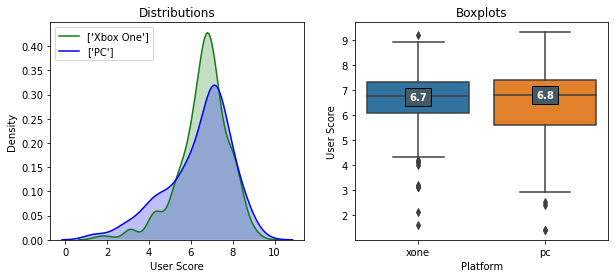

In [30]:
alpha = 0.05
fig, ax = plt.subplots(1,2,figsize=(10, 4))
#histograms of the density of user scores for xbox one and pc games
sns.kdeplot(ax=ax[0], data = videogame_2014_plus[videogame_2014_plus['Platform'] == 'xone']['User_Score'], label = ['Xbox One'], shade=True, color='#107C10');
sns.kdeplot(ax=ax[0], data = videogame_2014_plus[videogame_2014_plus['Platform'] == 'pc']['User_Score'],label = ['PC'], shade=True, color ='blue');
ax[0].set_title("Distributions");
ax[0].set_ylabel("Density");
ax[0].set_xlabel("User Score");
#boxplots of user scores for xbox one and pc games
box_plot = sns.boxplot(ax=ax[1], x='Platform', y='User_Score', data=videogame_2014_plus[(videogame_2014_plus['Platform'] == 'pc') | (videogame_2014_plus['Platform'] == 'xone')])
ax[1].set_title("Boxplots");
ax[1].set_ylabel("User Score");
ax[1].set_xlabel("Platform");
#adding the median values to the middle of the boxplots
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

#function to calculate the location of the median and design the format of the box with the median value in it.
for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 
#formatting of the median value box
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

#t-test 
results = stats.ttest_ind(videogame_2014_plus[videogame_2014_plus['Platform'] == 'xone']['User_Score'],videogame_2014_plus[videogame_2014_plus['Platform'] == 'pc']['User_Score'])
print('Null Hypothesis: Xbox One games and PC games have the same User Scores')
print('Alternative Hypothesis: Xbox One games and PC games have different User Scores')
print('\n')
#pull the p-value from the results
print('p-value: ', results.pvalue)
print('\n')
#compare the p-value to our alpha level
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 
print('\n')

#### Conclusions

Looking at the two graphs, Xbox One games have a tighter distribution with a lower mean and median than PC games. Our t-test tells us we cant reject the null hypothesis that Xbox One and PC games have the same user scores at an alpha of 0.05. Our p-value of 0.14 says that this data would occur if Xbox One and PC games had the same user scores 14% of the time. This means, statistically speaking, PC games do not score higher user scores than Xbox One games.

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary<a class="tocSkip"> </h2>
    <br/>
<b>Remarks and recommendations📌:</b> 
        
Useful tip: if there are any missing values in your samples you can drop them using `drop()` you did it, it is absolutely correct, or (and this method is more correct) you can use special argument `nan_policy` that can specified as `omit`, so it helps to drop NaN values too in  `st.ttest_ind`

       
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
</div>

### Action vs Sports User Ratings

Null Hypothesis: Action games and Sports games have the same User Scores
Alternative Hypothesis: Action games and Sports games have different User Scores


p-value:  1.722224988390936e-35


We reject the null hypothesis


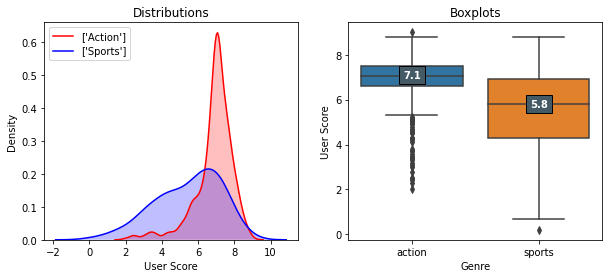

In [31]:
results = stats.ttest_ind(videogame_2014_plus[videogame_2014_plus['Genre'] == 'action']['User_Score'],videogame_2014_plus[videogame_2014_plus['Genre'] == 'sports']['User_Score'])

fig, ax = plt.subplots(1,2,figsize=(10, 4))
sns.kdeplot(ax=ax[0], data = videogame_2014_plus[videogame_2014_plus['Genre'] == 'action']['User_Score'], label = ['Action'], shade=True, color='red');
sns.kdeplot(ax=ax[0], data = videogame_2014_plus[videogame_2014_plus['Genre'] == 'sports']['User_Score'],label = ['Sports'], shade=True, color ='blue');
ax[0].set_title("Distributions");
ax[0].set_ylabel("Density");
ax[0].set_xlabel("User Score");
box_plot = sns.boxplot(ax=ax[1], x='Genre', y='User_Score', data=videogame_2014_plus[(videogame_2014_plus['Genre'] == 'action') | (videogame_2014_plus['Genre'] == 'sports')])
ax[1].set_title("Boxplots");
ax[1].set_ylabel("User Score");
ax[1].set_xlabel("Genre");
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

print('Null Hypothesis: Action games and Sports games have the same User Scores')
print('Alternative Hypothesis: Action games and Sports games have different User Scores')
print('\n')
print('p-value: ', results.pvalue)
print('\n')
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

#### Conclusions

Looking at the two graphs, action games have a tighter distribution with a higher mean and median than sports games. Our t-test tells us we can reject the null hypothesis that action and sports games have the same user scores. This means, statistically speaking, action games score higher user scores. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary<a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b>
        
Ok, you correctly formulated H0 and H1 in both cases and used correct method for statistical hypotheses testing. A big plus for so informative visualization here.

## Overall Conclusion

In this project I looked at video game data from 1980 to 2016. After some standard data cleaning, I realized there was a huge amount of missing data. After checking if the data was missing completely at random, it was clear that there was a pattern to the missing data. For this reason, if I dropped the missing observations, the dataset would be biased. Next, after checking for patterns among the missing data, it was clear that the pattern was very complex and could not be solved with a simple imputation method. This led to the use of a random forest imputation function called MissForest. After imputing the values, it was finally time to start analyzing the data. 

The main takeaways from the analyzing data from 1980 to 2016 were:

* Videogames started to become popular around 1995 and the number of games being released per year peaked around 2009.
* The PS2 had the most game sales from 1980 to 2016.
* Most platforms have around a 10-year life span that peaks around the 5th year.
* New consoles seem to be released in waves with older consoles dying out a couple years after the new consoles arrive.

Afterwards, I decided to trim the data to 2014 to 2016 to give us a better understanding of the current market. 

The main takeaways from analyzing data from 2006 to 2016 were:
* The platforms that dominated the mid to late 2000's started to be replaced around 2014.
* The critic score of a game has a higher correlation with total sales than the user score.
* When looking at games sold on the PS4, the sales of the PS4 versions of those games outperformed all other platforms.
* The most common genre for a videogame is action, but the best-selling genre is shooter.
* Users give harsher reviews than critics on sports, shooter, platform, and racing games. Yet, Users seem to enjoy puzzle and adventure games more than critics.
* Sports, racing, and puzzle games target younger audiences with most of their games being rated E, while fighting, role-playing and adventure games target older audiences with most of their games being rated M. 
* Compared to other console brands, Nintendo users prefer puzzle and simulation games, while Playstation users prefer fighting games. 

The next step was to look at regional differences. 

The main takeaways from analyzing regional differences from 2006 to 2016 were:
* Handheld platforms are relatively more popular in Japan than the EU and North America.
* The market for Xbox and PC games in Japan is very small.
* Action, sports and shooter games are the most popular in the EU and North America, while role-playing games are the most popular in Japan.
* The EU has its largest market share in the racing and simulation game genre. 
* Games rated M (Mature) sell the best, while games rated T (Teen) and E10+ (Everyone 10+) sell the worst in all regions. 

Lastly, I looked at a couple hypothesis to look at some variation among user scores.

The main takeaways from running the hypothesis tests were:
* PC games do not have statistically significant higher user scores on average than Xbox One games.
* Action games receive statistically significantly higher user scores on average than sports games. 

Overall, it is clear that the video game industry is an industry of innovation. As new platforms arrive, old ones become obsolete. Even genre preferences change over time. Aditionally, as of 2020, mobile games account for over 50 percent of video game revenue worldwide and that is not even looked at in this dataset. Source: <cite>[Statistica][4]</cite> All in all, my advice to the marketing team would be to use social listening tools in combination with past data going back only a few years to best decide where to allocate resources as trends seem to move fast in this industry.

[4]: https://www.statista.com/statistics/292751/mobile-gaming-revenue-worldwide-device/

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion**

Ben, thank you for submitting your project! I can see that you've worked really hard on it! I'm really impressed this the amount of work you have done, you used a lot of interesting and really advanced approaches and techniques. But there are several things in your project which I suppose it is important to fix in order to make your project really ideal! My comments will navigate you!


**Good things and practices in your project I want to highlight🙂**:

* You use different methods for working with your data. It is really great that you can apply these methods on practice, keep it up!
* You worked with the visualization, it is really good that you use plots in your work and formatted them correctly!
* You have formulated conclusions after the each step of the analysis, good job!
* You correctly used test for statistical hypotheses testing.
    
**What is worth working on👀**:

* It is important to correct the current period and correct other steps of the analysis according new period slice
* Fix all bugs in your code
* Other recommendations you will find in my comments.

**Good luck! I will wait for your work for a second iteration of the review!😉**
![gif](https://media.giphy.com/media/j1Xyt3DHfJcmk/giphy.gif)  

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion:second iteration of the review**

Ben, thank you for submitting your project with corrections! I can see all your improvements, you managed to fix almost everything, you are doing greatm but there are still one technical error in the code (key error) and I left recommendations for upgrading Python library to the concrete version, try to fix one bug  and come back for the review:)
    
**Good luck! I will wait for your work for the review!😉**

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion: third iteration of the review**

Ben, thank you for submitting your project with corrections again!
    
Now everything is alright, so I hasten to say that your project has been accepted and you can proceed to the next sprint!
    
**I wish you exciting and cool projects in the next sprints😉**

![gif](https://media.giphy.com/media/l41Yh1olOKd1Tgbw4/giphy.gif)  